### ELLA results plots

In [ ]:
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from tqdm import tqdm
from scipy.stats import beta
from collections import Counter
import matplotlib.gridspec as grid_spec
from sklearn.neighbors import KernelDensity

# transparent background
plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),  
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),  
})

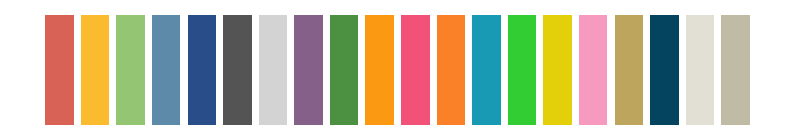

In [2]:
# define colors
purple = '#856088'
pink = '#F25278'
red = '#d96256'
lightgreen = '#93c572'
darkgreen = '#4c9141'
lightblue = '#5d8aa8'
darkblue = '#284d88'
white = '#fafafa'
lightgray = '#d3d3d3'
darkgray ='#545454'
lightorange = '#fabc2e'
darkorange = '#fb9912'
lightyellow = '#e4d00a'
lightgreen2 = '#32CD32'
lightblue2 = '#189AB4'
darkblue2 = '#05445E'
lightpink = '#F79AC0'
darkorange2 = '#FA8128'
darkyellow = '#BDA55D'
lightgray2 = '#E2E0D4'
lightgray3 = '#BFBBA4'

colors = [
    red, lightorange, lightgreen, lightblue, darkblue, 
    darkgray, lightgray, purple, darkgreen, darkorange,
    pink, darkorange2, lightblue2, lightgreen2, lightyellow,
    lightpink, darkyellow, darkblue2, lightgray2, lightgray3
]

plt.figure(figsize=(10, 1.5))
plt.bar(range(len(colors)), height=1, color=colors)
__ = plt.axis('off')

#### load ella results

In [3]:
fn = '../ella/output_ella/ella_merfish_mouse_brain.pkl'
res_dict = pd.read_pickle(fn)
type_list = res_dict['types_list']
gene_dict = res_dict['genes_dict']
cell_dict = res_dict['cells_dict']
kernel_list = res_dict['kernels_list']
p_fdr_dict = res_dict['p_fdr_dict']
score_dict = res_dict['score_dict']
lam_dict = res_dict['lam_dict']
label_dict = res_dict['label_dict']
del res_dict

#### number of genes included

Text(0, 0.5, 'Number of Genes')

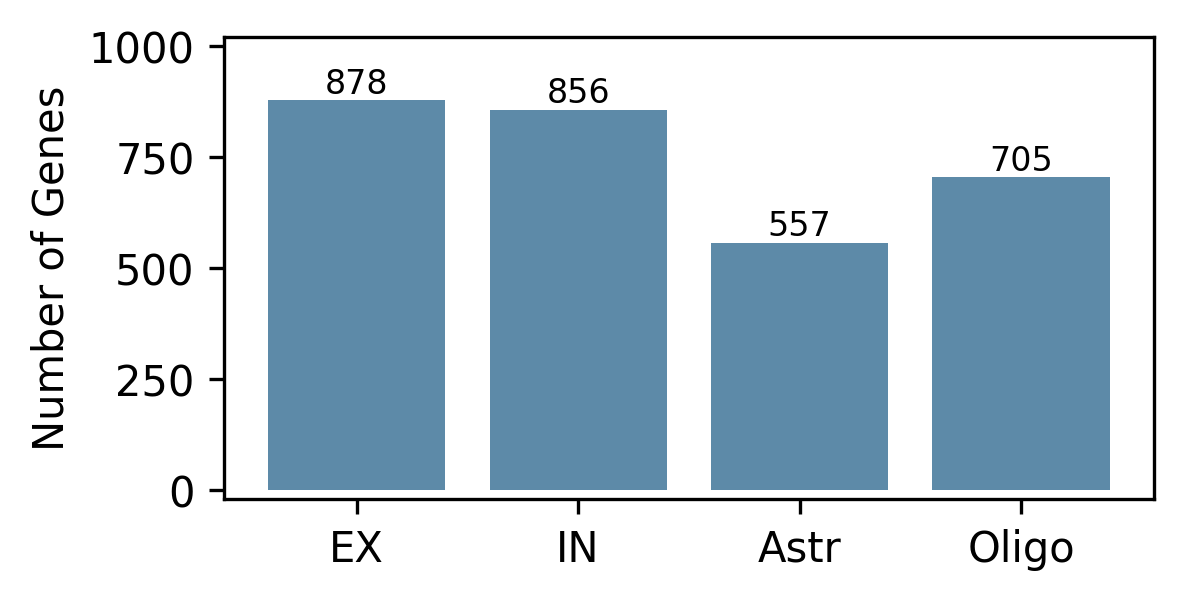

In [4]:
nr = 1
nc = 1
ss_nr = 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

tl = type_list
num_genes = []
for t in tl:
    num_genes.append(len(gene_dict[t]))
ax.bar(tl, num_genes, color=lightblue)
ax.set_ylim(-20, 1020)
ax.set_xlim(-0.6, 3.6)
for i in range(len(tl)):
    plt.text(tl[i], num_genes[i], str(num_genes[i]), ha='center', va='bottom', fontsize=8)
ax.set_ylabel('Number of Genes')  

#### number of cells of each type

Text(0, 0.5, 'Number of Cells')

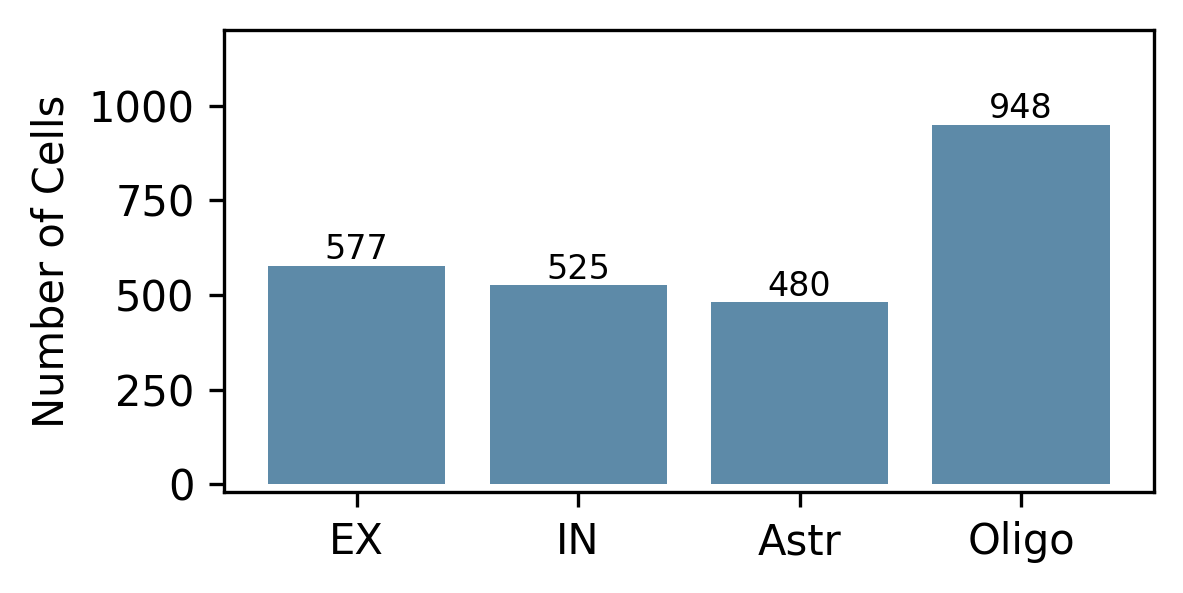

In [5]:
nr = 1
nc = 1
ss_nr = 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

tl = type_list
num_cells = []
for t in tl:
    num_cells.append(len(cell_dict[t]))
ax.bar(tl, num_cells, color=lightblue)
ax.set_ylim(-20, 1200)
ax.set_xlim(-0.6, 3.6)
for i in range(len(tl)):
    plt.text(tl[i], num_cells[i], str(num_cells[i]), ha='center', va='bottom', fontsize=8)
ax.set_ylabel('Number of Cells')    

#### number of sig genes

Text(0, 0.5, 'Number of Genes')

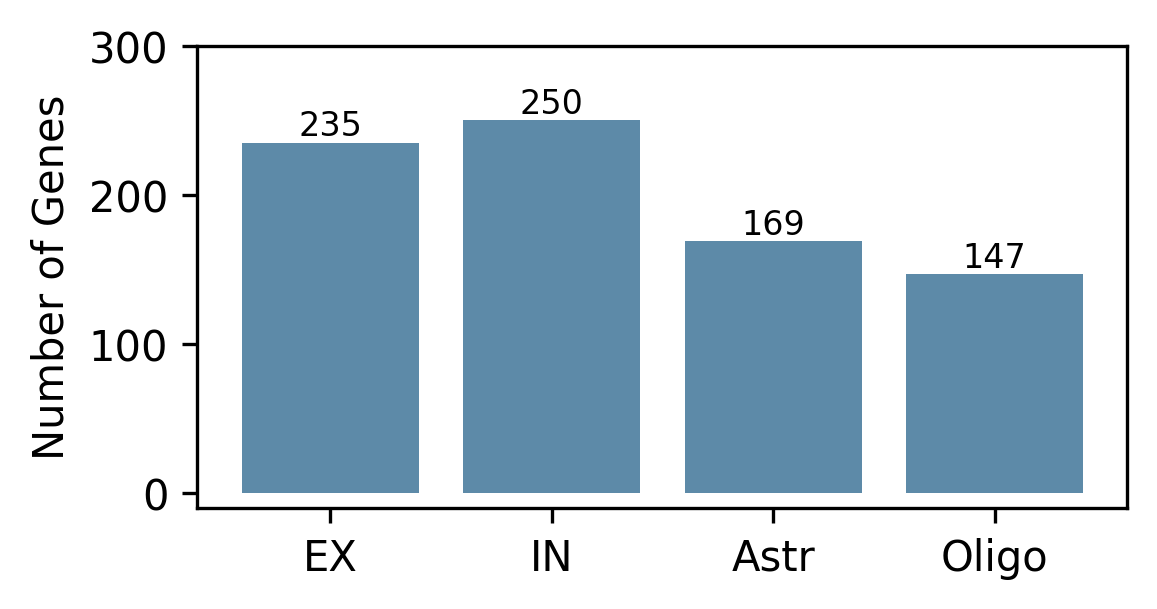

In [6]:
nr = 1
nc = 1
ss_nr = 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

tl = type_list
num_sig = []
for t in tl:
    num_sig.append(np.sum(p_fdr_dict[t]<=0.05))
ax.bar(tl, num_sig, color=lightblue)
ax.set_ylim(-10, 300)
ax.set_xlim(-0.6, 3.6)
for i in range(len(tl)):
    plt.text(tl[i], num_sig[i], str(num_sig[i]), ha='center', va='bottom', fontsize=8)
ax.set_ylabel('Number of Genes')

#### all cell types together

In [7]:
# merge labels
label_all = np.concatenate(list(label_dict.values()))
label_cluster, label_num = np.unique(label_all, return_counts=True)
print(label_cluster)
print(label_num)

[-1  0  1  2  3]
[2195  337  125  185  154]


In [ ]:
# common genes
gene_all = np.concatenate(list(gene_dict.values()))
gene_all_sig = gene_all[label_all>-1]
print(f'#distinct={len(np.unique(gene_all_sig))}')

# genes sig in >=2 types
unique_genes, counts = np.unique(gene_all_sig, return_counts=True)
duplicate_genes = unique_genes[counts >= 2]
print(len(duplicate_genes))

In [9]:
# find TF in duplicate_elements
fn = 'input/Browse Transcription Factors mm9 - resource_browser.csv'
tab = pd.read_csv(fn)
tf_list = tab.Symbol.unique().tolist()
print(f'total #TF {len(tf_list)}')

list1_lower = [item.lower() for item in tf_list]
list2_lower = [item.lower() for item in duplicate_genes]
common_genes = set(list1_lower).intersection(set(list2_lower))
print(len(common_genes))

total #TF 1385
36


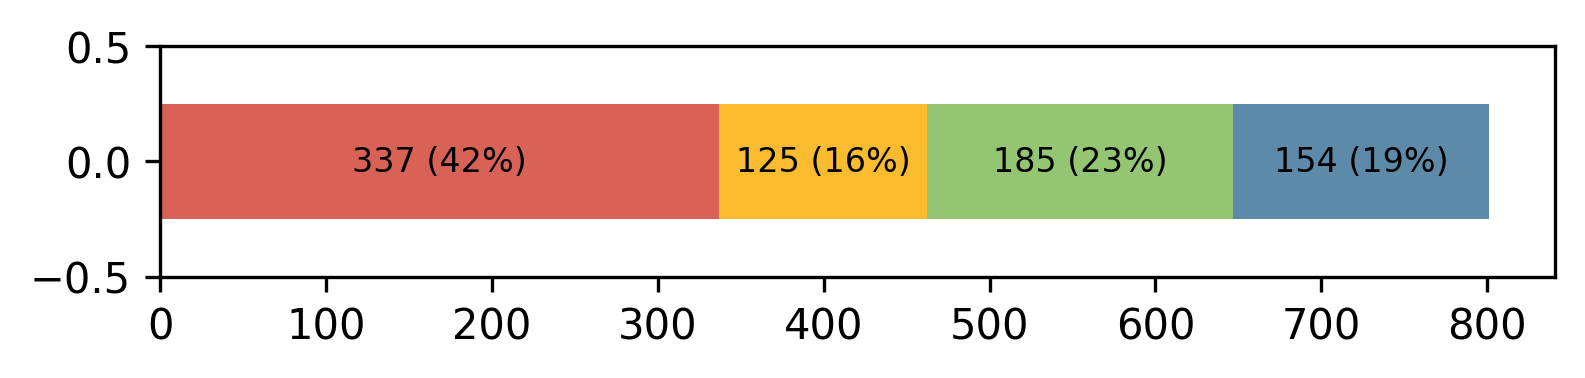

In [43]:
# barplot number of genes
bar_width = 0.5
bar_positions = [0, 1]
colors = [red, lightorange, lightgreen, lightblue]

nr = 1
nc = 1
ss_nr = 1
ss_nc = 6
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

# sig genes
labels_num_sig = label_num[1:]
left = 0
for i in range(4):
    ax.barh(bar_positions[0], labels_num_sig[i], bar_width, left=left, color=colors[i])
    left += labels_num_sig[i]
    ax.text(left - labels_num_sig[i]/2, bar_positions[0], f'{labels_num_sig[i]} ({labels_num_sig[i]/np.sum(labels_num_sig)*100:.0f}%)', fontsize=8, ha='center', va='center', color='black')

ax.set_ylim(-0.5, 0.5)

# plt.savefig(f'figs/fig_labels_all_bar.pdf', dpi=300, bbox_inches='tight')

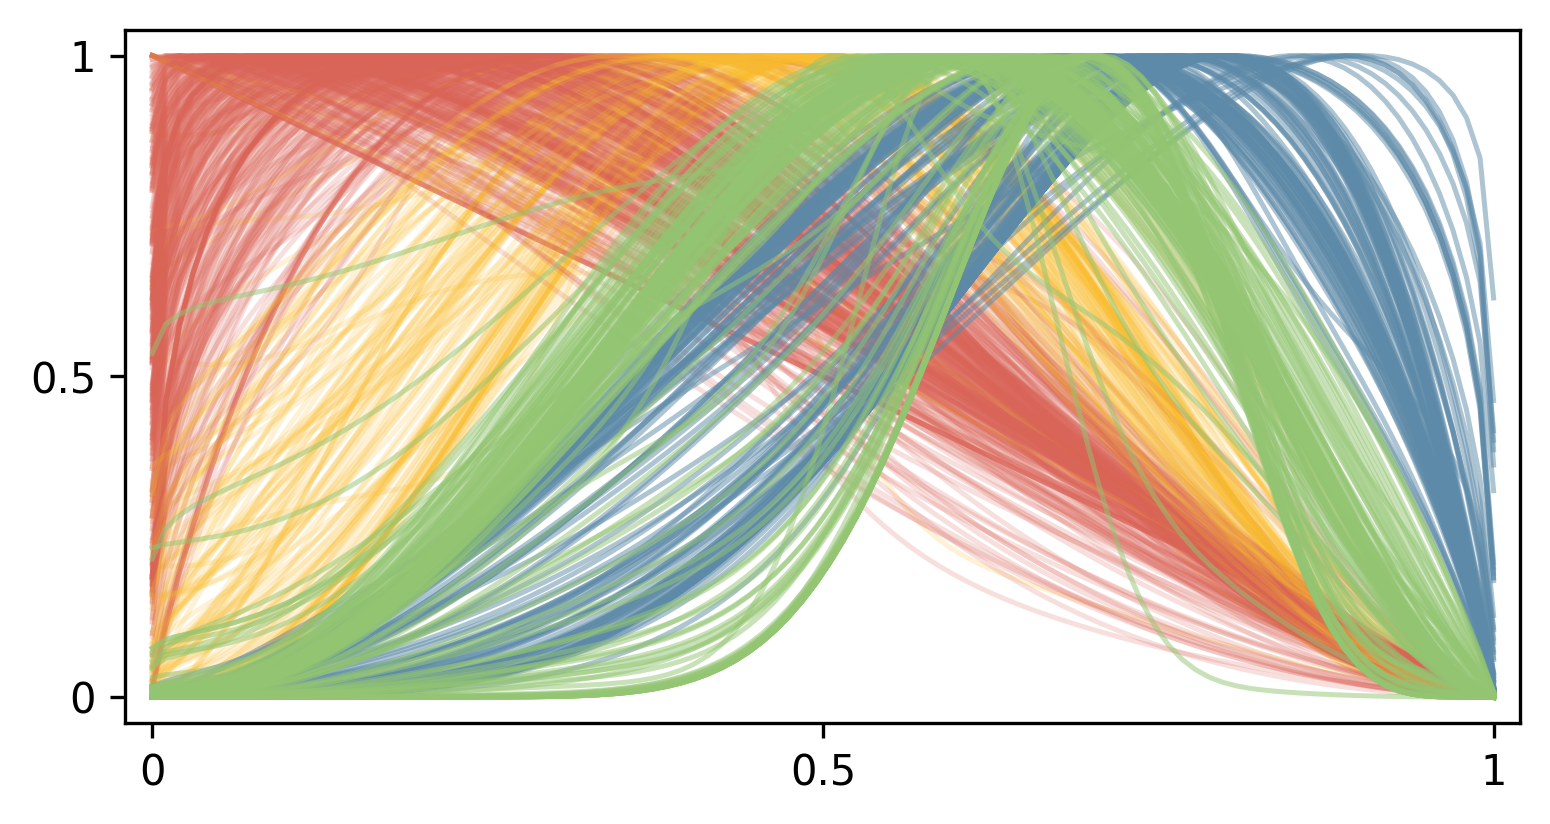

In [39]:
# lam est
x = np.linspace(0, 1, 100)
colors = [red, lightorange, lightgreen, lightblue]

nr = 1
nc = 1
ss_nc = 6
ss_nr = 3
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

for t in type_list:
    label_t = label_dict[t]
    lam_t = lam_dict[t]
    gene_t = gene_dict[t]
    for j in range(len(gene_t)):
        l = label_t[j]
        if l>-1:
            color = colors[l]
            if color==darkorange: 
                zorder=4
                alpha=0.5
            elif color==lightgreen: 
                zorder=3
                alpha=0.5
            elif color==lightblue:
                zorder=2
                alpha=0.5
            else: 
                zorder=1
                alpha=0.2
            lam_j = lam_t[j]
            lam_std_j = (lam_j-np.min(lam_j))/(np.max(lam_j)-np.min(lam_j)) # min-max std
            ax.plot(x, lam_std_j, alpha=alpha, lw=1.2, color=color, zorder=zorder)

ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.04, 1.04)
__ = ax.set_xticks([0,0.5,1], [0,0.5,1])
__ = ax.set_yticks([0,0.5,1], [0,0.5,1])

# plt.savefig(f'figs/fig_lam_all.pdf', dpi=300, bbox_inches='tight')

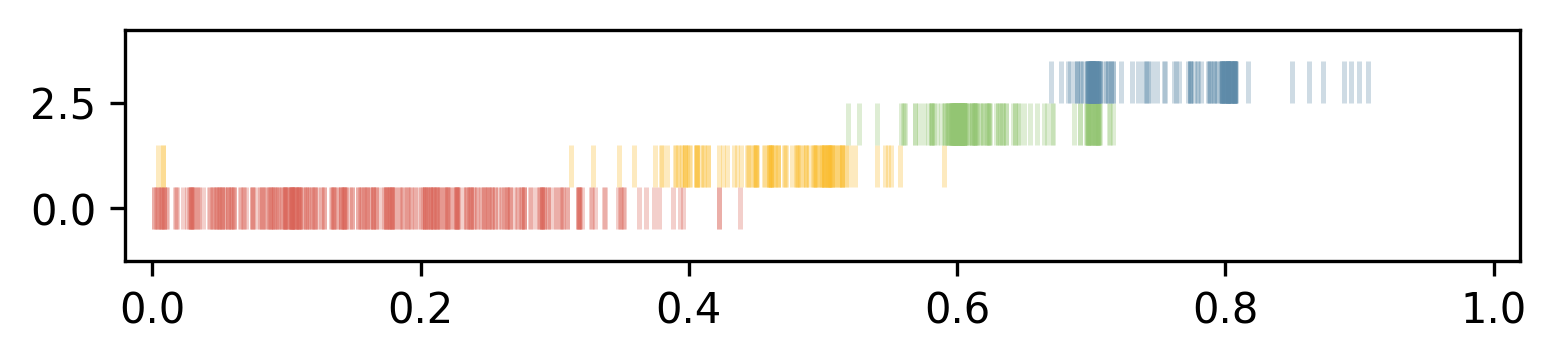

In [40]:
# pattern scores event plot
scores_all = np.concatenate(list(score_dict.values()))
labels_all = np.concatenate(list(label_dict.values()))
scores_all_sig = scores_all[labels_all>-1]
labels_all_sig = labels_all[labels_all>-1]

colors = [red, lightorange, lightgreen, lightblue]

nr = 1
nc = 1
ss_nc = 6
ss_nr = 1
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

alpha=0.3
ll=1
lw=1.2

for k in range(4):
    scores_k = scores_all_sig[labels_all_sig==k]
    ax.eventplot([scores_k + np.random.uniform(0, 0.01, len(scores_k))], 
                 orientation='horizontal', 
                 colors=[colors[k]],
                 alpha=alpha,
                 linelengths=ll, lw=lw, lineoffsets=k)

ax.set_xlim(-0.02, 1.02)

# plt.savefig(f'figs/fig_score_all_event.pdf', dpi=300, bbox_inches='tight')

#### individual cell types

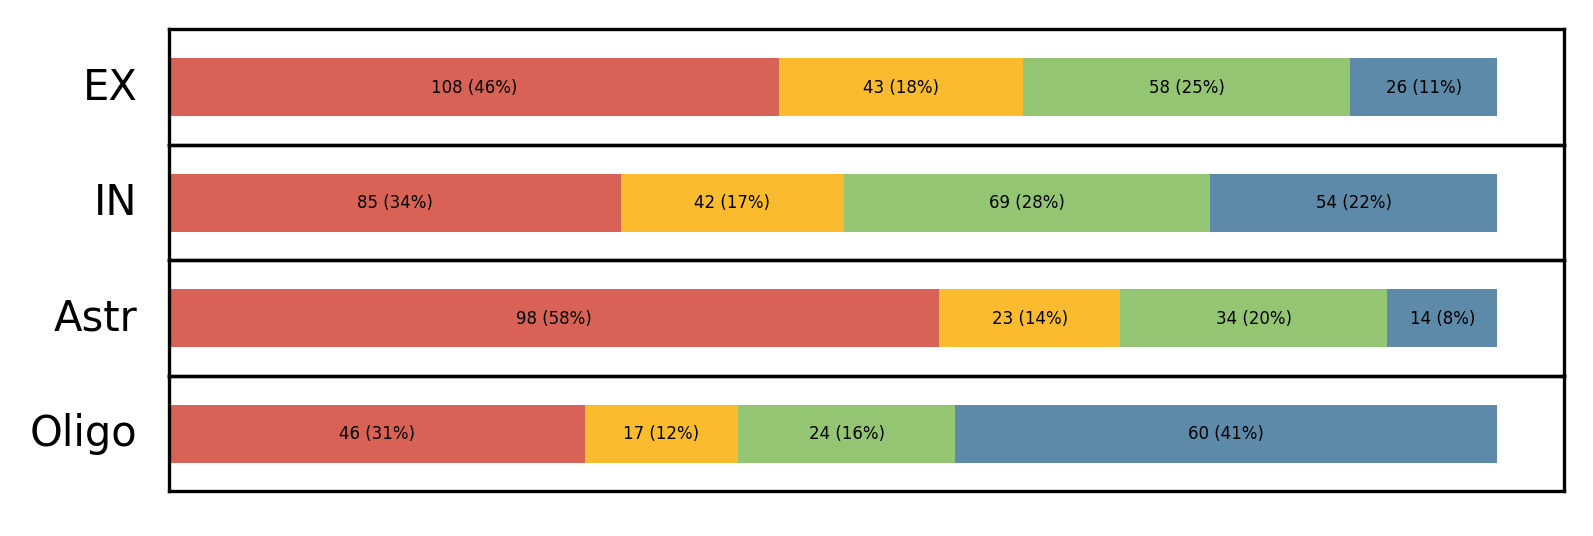

In [41]:
# barplot number of genes
bar_width = 0.5
bar_positions = [0, 1]
colors = [red, lightorange, lightgreen, lightblue]

nr = 4
nc = 1
ss_nr = 0.5
ss_nc = 6
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

for j, t in enumerate(type_list):
    ax = plt.subplot(gs[j, 0])
    
    labels_t = label_dict[t]
    labels_cluster_t, labels_num_t = np.unique(labels_t, return_counts=True)
    labels_num_sig_t = labels_num_t[1:]
    
    # sig genes
    left = 0
    for i in range(4):
        ax.barh(bar_positions[0], labels_num_sig_t[i], bar_width, left=left, color=colors[i])
        left += labels_num_sig_t[i]
        ax.text(left - labels_num_sig_t[i]/2, bar_positions[0], f'{labels_num_sig_t[i]} ({labels_num_sig_t[i]/np.sum(labels_num_sig_t)*100:.0f}%)', fontsize=4, ha='center', va='center', color='black')

    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks([])
    ax.set_ylabel(t, rotation=0, ha='right', va='center') 
    ax.set_yticks([])

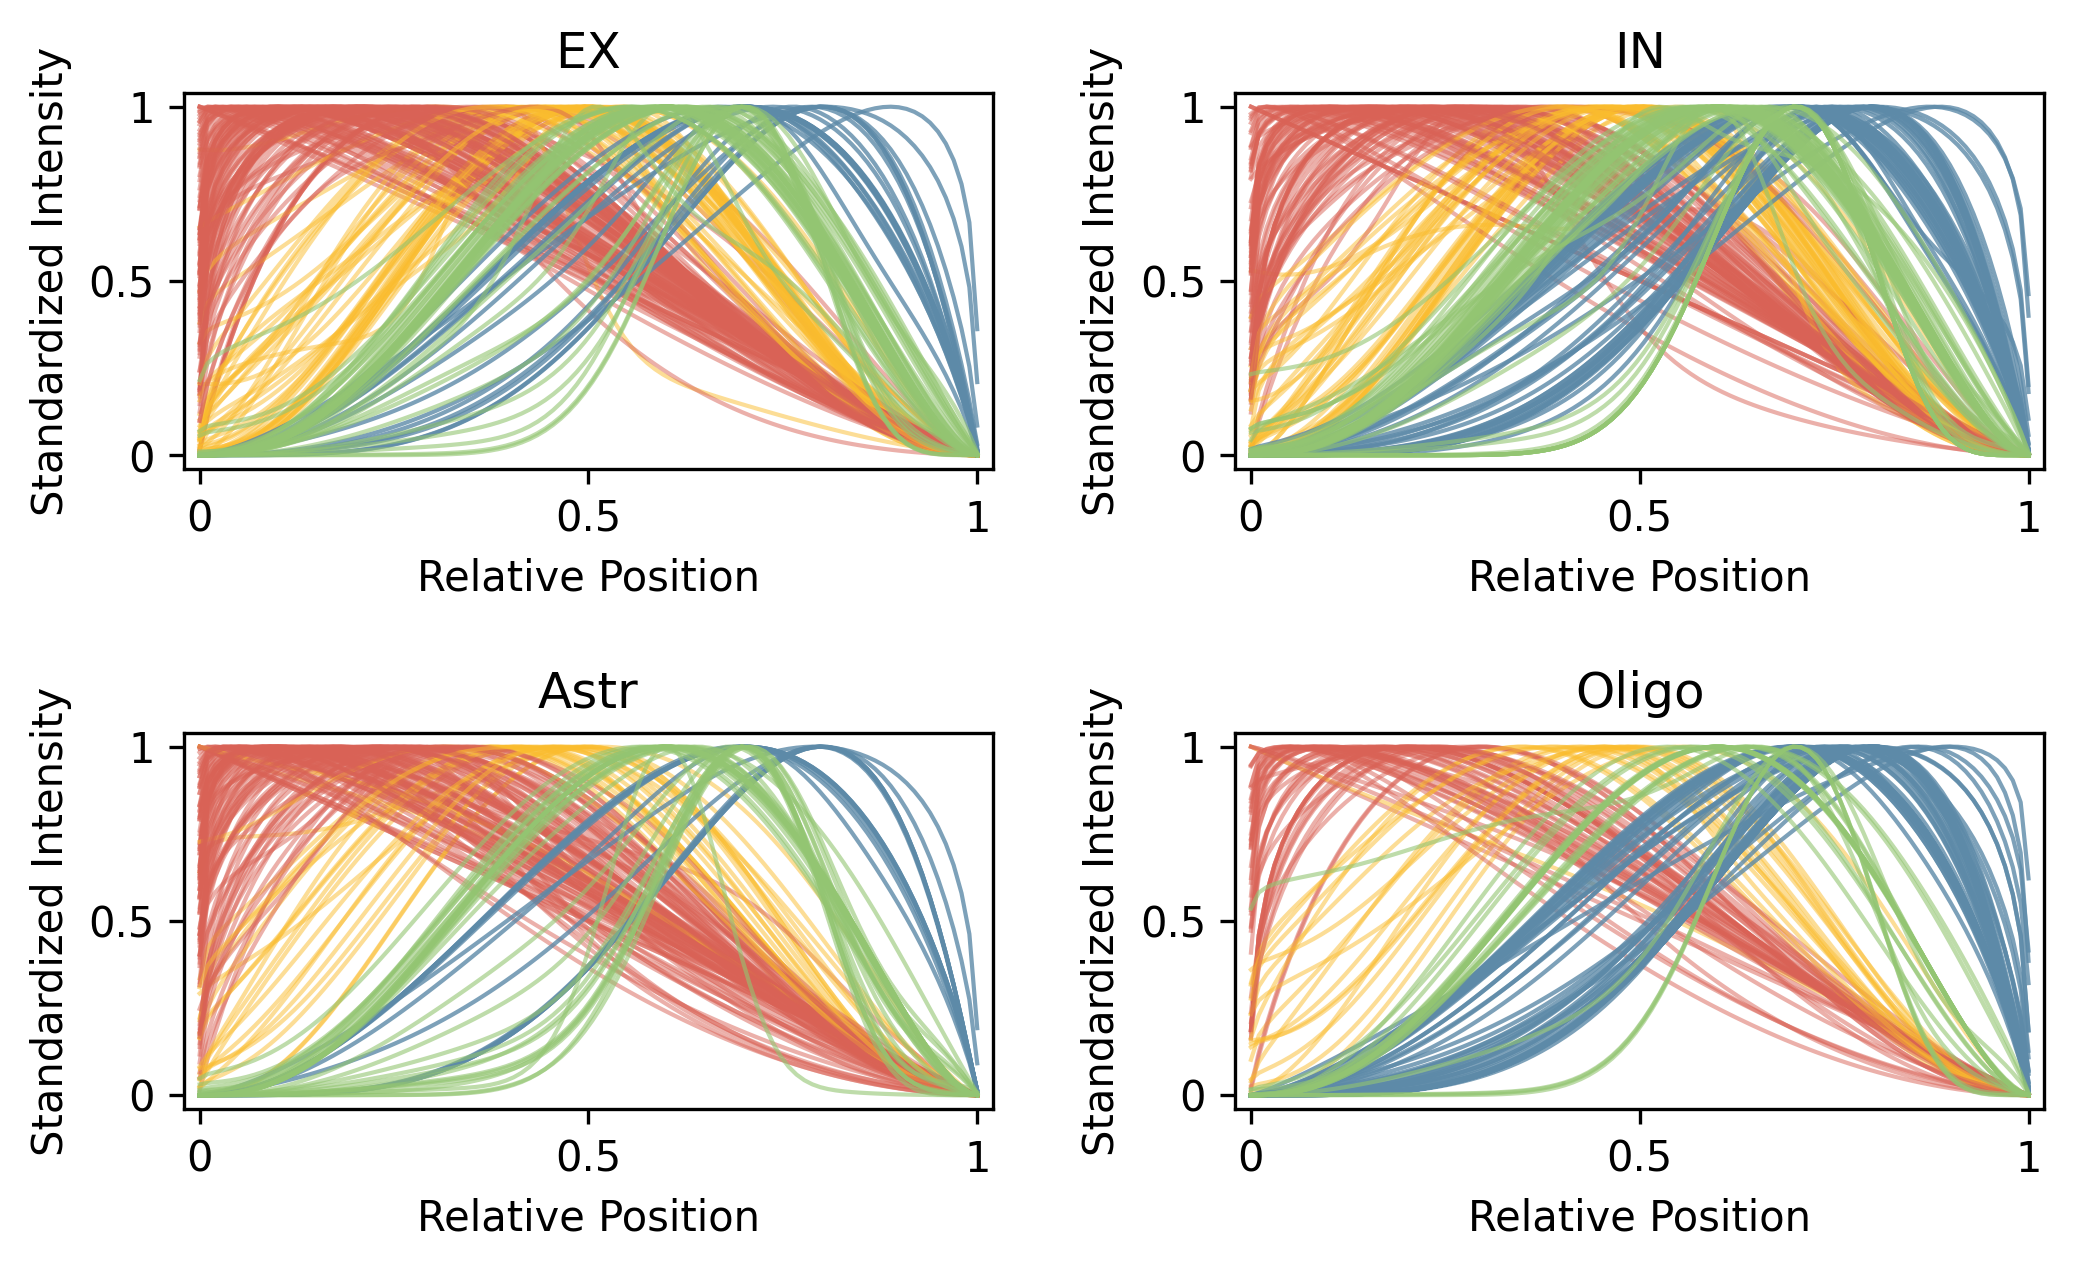

In [14]:
# lam est
x = np.linspace(0, 1, 100)
colors = [red, lightorange, lightgreen, lightblue]

nr = 2
nc = 2
ss_nc = 4
ss_nr = 2.2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.3, hspace=0.7)

for i, t in enumerate(type_list):
    ax = plt.subplot(gs[i//nc, i%nc])
    
    label_t = label_dict[t]
    lam_t = lam_dict[t]
    gene_t = gene_dict[t]
    
    for j in range(len(gene_t)):
        l = label_t[j]
        if l>-1:
            color = colors[l]
            if color==darkorange: 
                zorder=4
                alpha=0.8
            elif color==lightgreen: 
                zorder=3
                alpha=0.6
            elif color==lightblue:
                zorder=2
                alpha=0.8
            else: 
                zorder=1
                alpha=0.5
            lam_j = lam_t[j]
            lam_std_j = (lam_j-np.min(lam_j))/(np.max(lam_j)-np.min(lam_j)) # min-max std
            ax.plot(x, lam_std_j, alpha=alpha, lw=1., color=color, zorder=zorder)

    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.04, 1.04)
    __ = ax.set_xticks([0,0.5,1], [0,0.5,1])
    __ = ax.set_yticks([0,0.5,1], [0,0.5,1])
    
    ax.set_ylabel('Standardized Intensity')    
    ax.set_xlabel('Relative Position')    
    ax.set_title(t)    

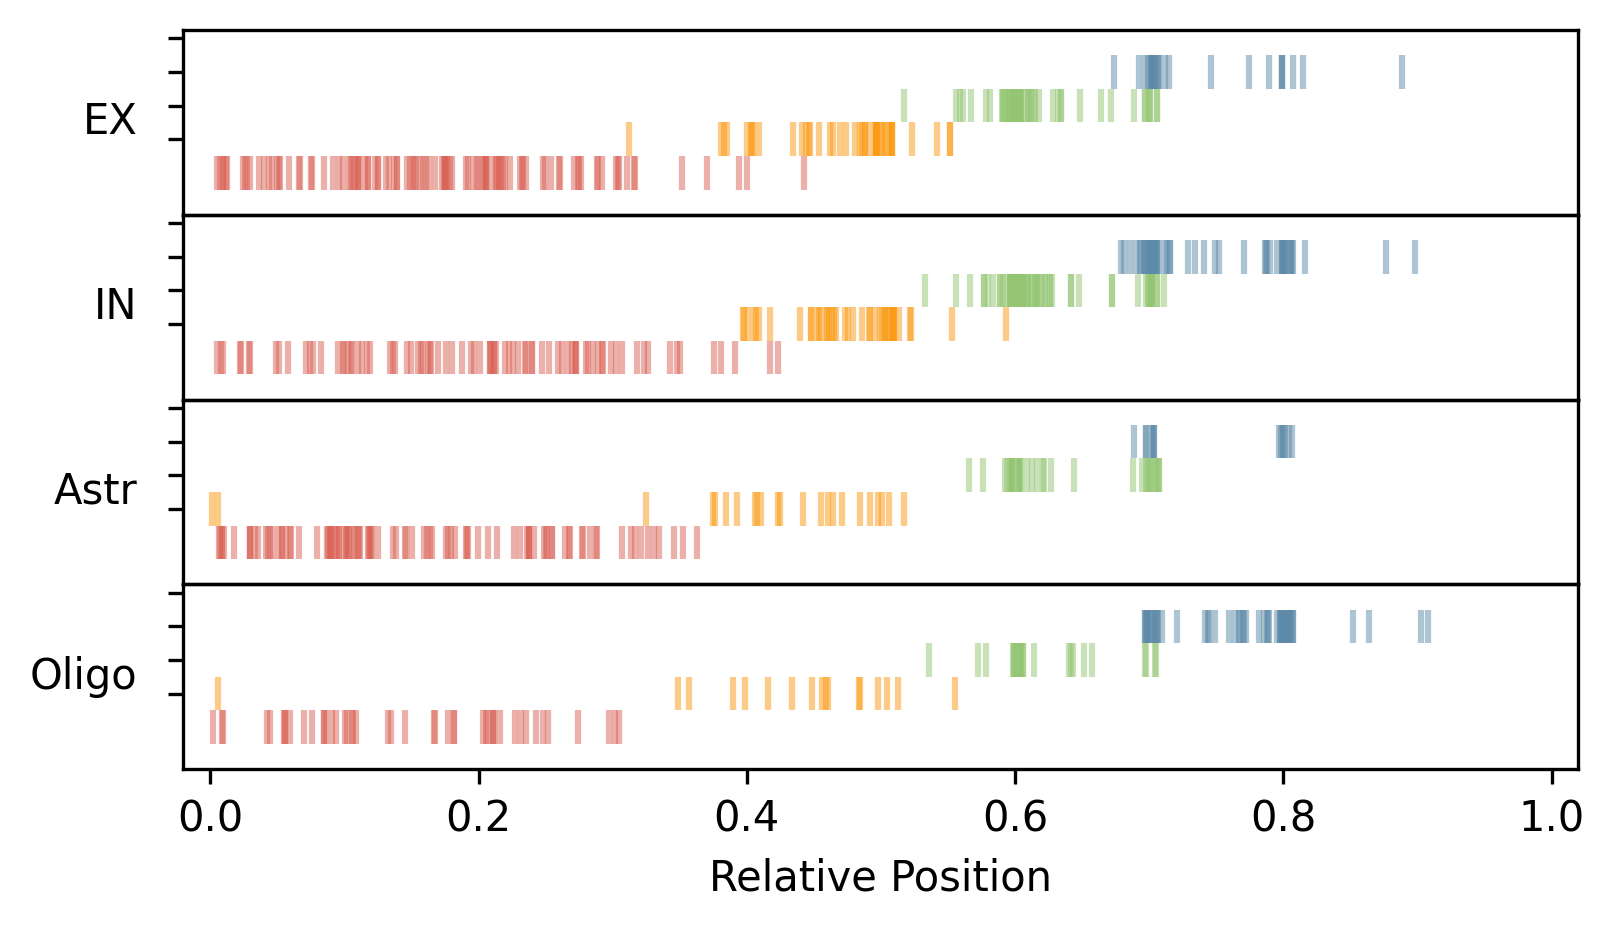

In [15]:
# pattern scores event plot
scores_all = np.concatenate(list(score_dict.values()))
scores_all_sig = scores_all[label_all>-1]
labels_all_sig = label_all[label_all>-1]

colors = [red, darkorange, lightgreen, lightblue, purple]

alpha=0.5
ll=1
lw=1.5

nr = 4
nc = 1
ss_nc = 6
ss_nr = 0.8
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

for j, t in enumerate(type_list):
    ax = plt.subplot(gs[j, 0])
    
    labels_t = label_dict[t]
    scores_t = score_dict[t]
    labels_sig_t = labels_t[labels_t>-1]
    scores_sig_t = scores_t[labels_t>-1]

    for k in range(4):
        scores_k = scores_sig_t[labels_sig_t==k]
        ax.eventplot([scores_k + np.random.uniform(0, 0.01, len(scores_k))], 
                     orientation='horizontal', 
                     colors=[colors[k]],
                     alpha=alpha,
                     linelengths=ll, lw=lw, lineoffsets=k)

    ax.set_xlim(-0.02, 1.02)
    if j<3: ax.set_xticks([])
    else: ax .set_xlabel('Relative Position')
    ax.set_ylabel(t, rotation=0, va='center', ha='right')
    ax.set_yticks([1,2,3,4], ['']*4)

#### compare EX and IN 

In [44]:
# nuclear genes
t = 'EX'
gene_t = gene_dict[t]
label_t = label_dict[t]
gene_c1 = np.array(gene_t)[label_t==0]
print(f'type {t}')
print(f'# of nuclear genes={len(gene_c1)}')

t = 'IN'
gene_t = gene_dict[t]
label_t = label_dict[t]
gene_c1 = np.array(gene_t)[label_t==0]
print(f'type {t}')
print(f'# of nuclear genes={len(gene_c1)}')

type EX
# of nuclear genes=108
type IN
# of nuclear genes=85


In [45]:
# Jaccard index
t = 'EX'
set1 = set(np.array(gene_dict[t])[label_dict[t]>=0])
t = 'IN'
set2 = set(np.array(gene_dict[t])[label_dict[t]>=0])
len(set1 & set2)/len(set1 | set2)

0.3179347826086957

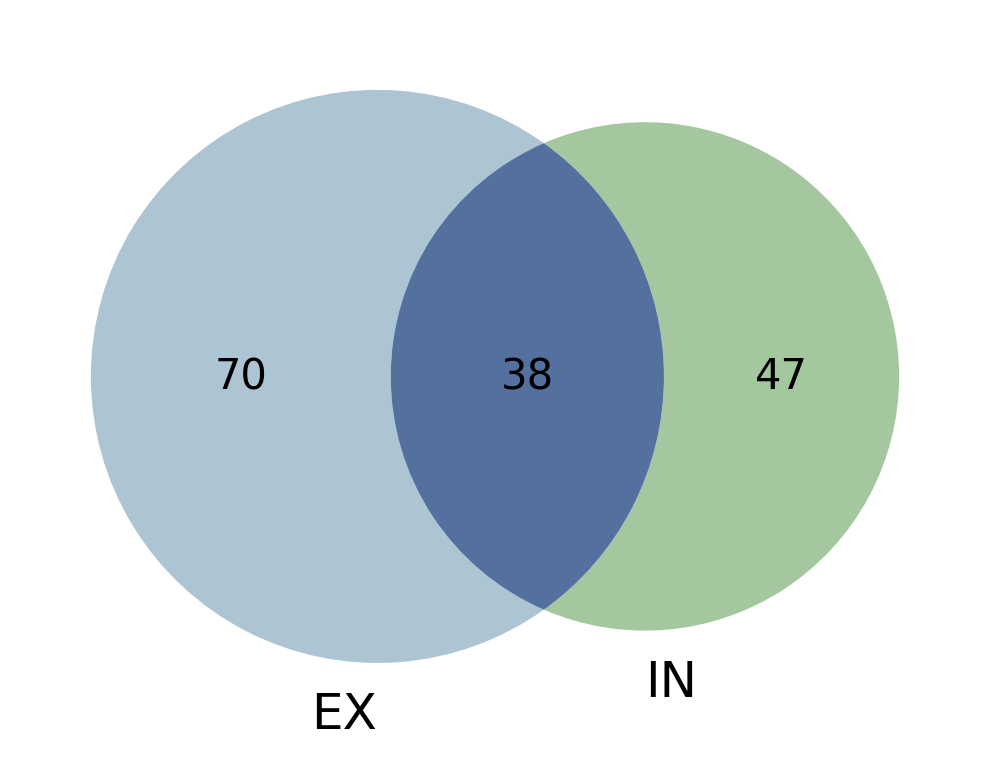

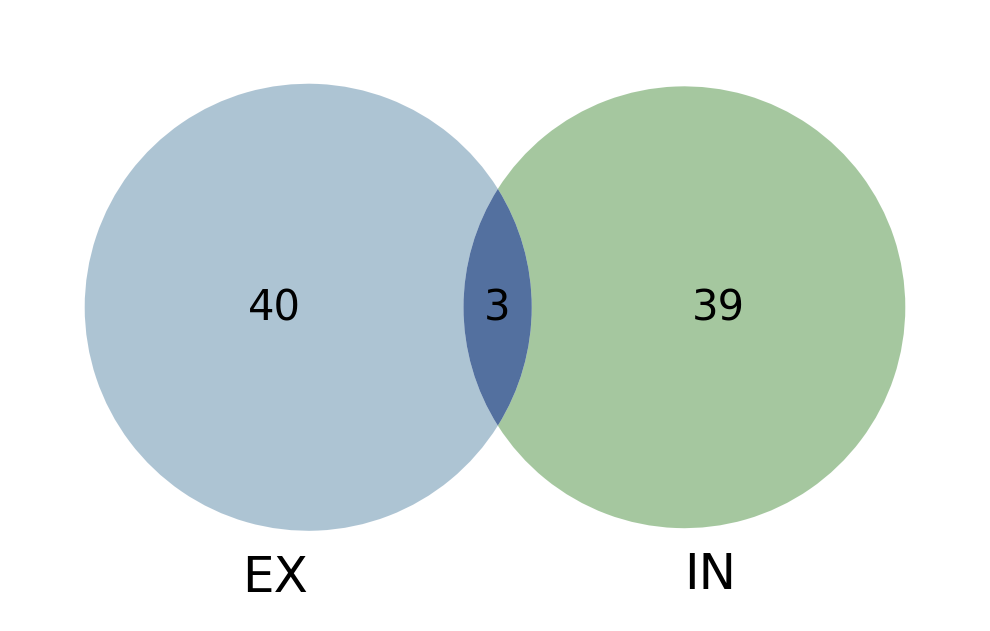

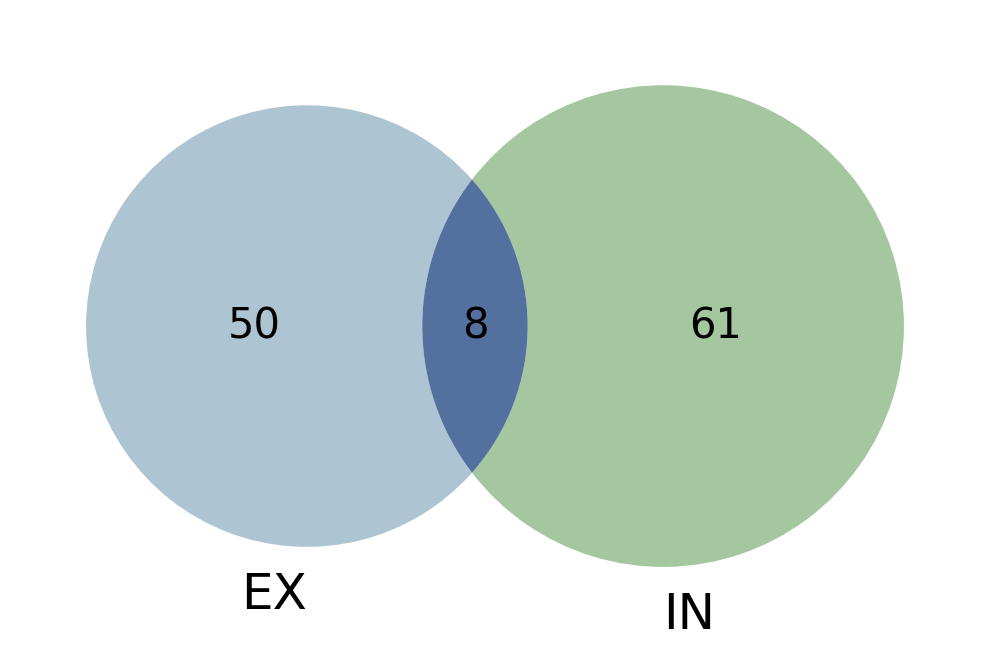

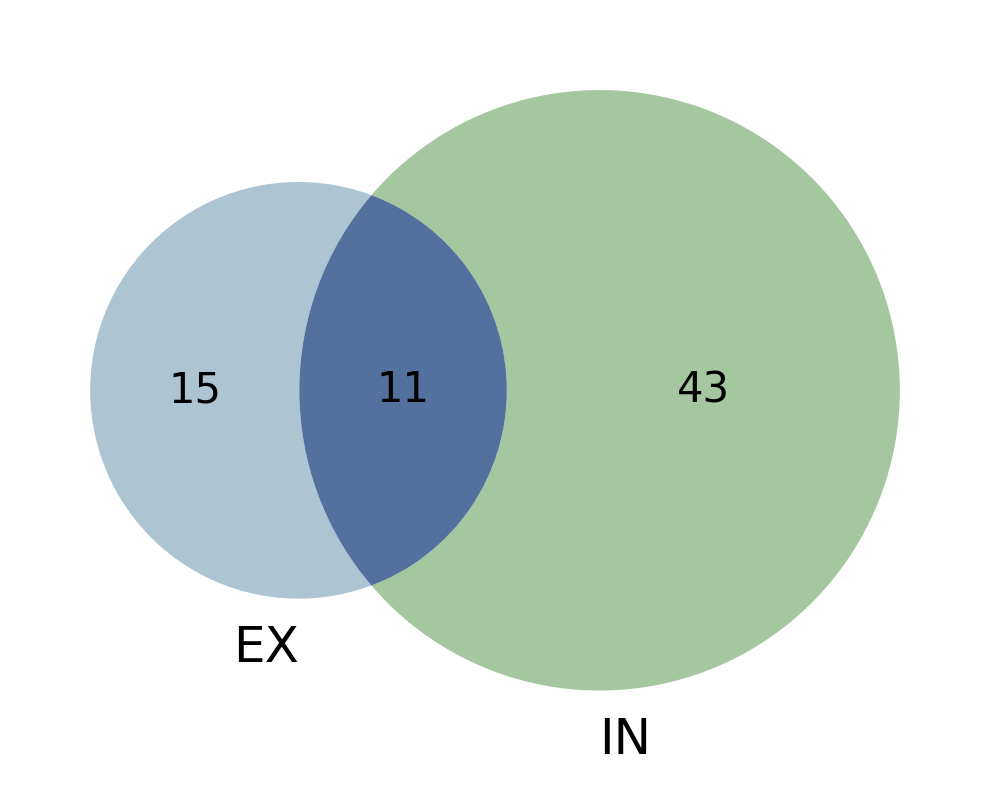

In [18]:
# venn plot of com genes in each cluster

for k in range(4):

    plt.figure(figsize=(4,4), dpi=300) 

    set1 = set(np.array(gene_dict['EX'])[label_dict['EX']==k])
    set2 = set(np.array(gene_dict['IN'])[label_dict['IN']==k])

    only_set1 = len(set1 - set2) 
    only_set2 = len(set2 - set1) 
    set1_and_set2 = len(set1 & set2) 

    venn = venn2(subsets=(only_set1, only_set2, set1_and_set2), set_labels=('EX', 'IN'))

    venn.get_patch_by_id('10').set_color(lightblue)
    # venn.get_patch_by_id('10').set_edgecolor(lightblue)
    venn.get_patch_by_id('10').set_alpha(0.5) 
    venn.get_patch_by_id('01').set_color(darkgreen)
    venn.get_patch_by_id('01').set_alpha(0.5) 
    venn.get_patch_by_id('11').set_color(darkblue)
    venn.get_patch_by_id('11').set_alpha(0.8) 
    
    for patch in venn.patches:
        patch.set_linewidth(0)

#     plt.savefig(f'figs/fig_com_venn_k{k}.pdf', dpi=300, bbox_inches='tight')
#     plt.savefig(f'figs/fig_com_venn_k{k}.png', dpi=300, bbox_inches='tight')

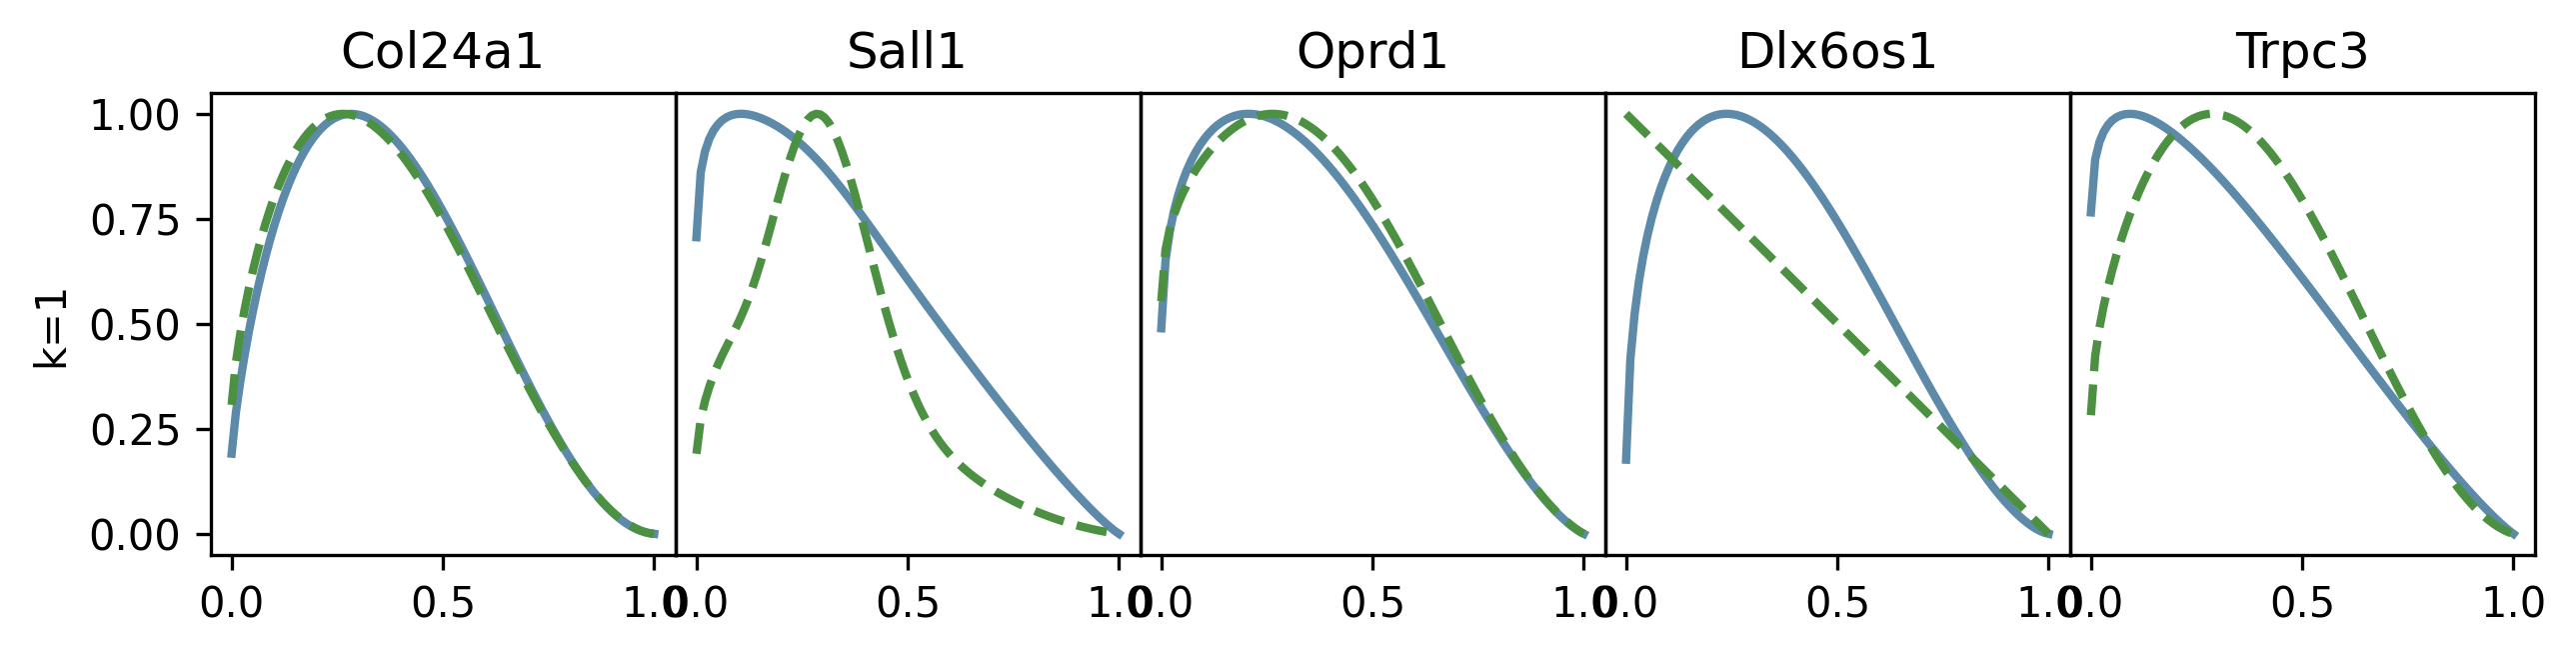

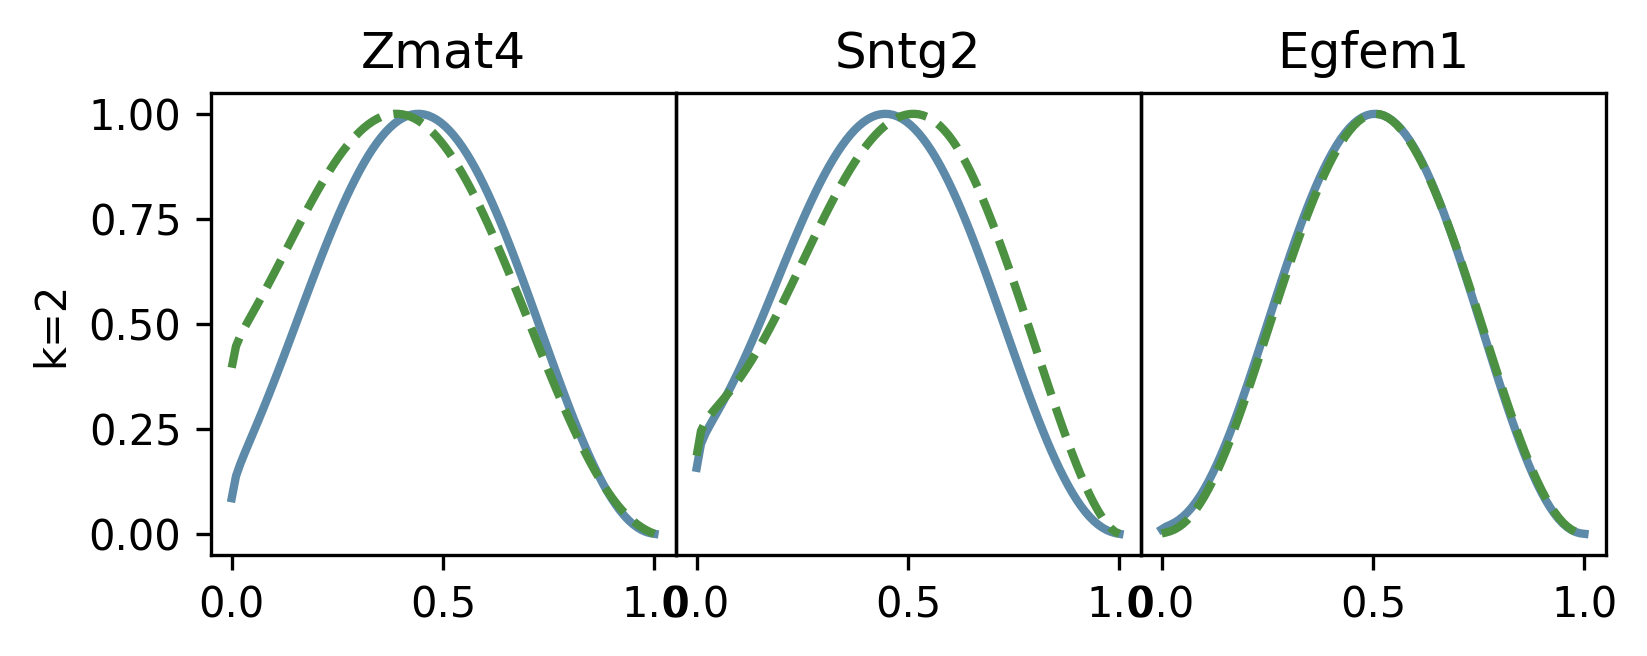

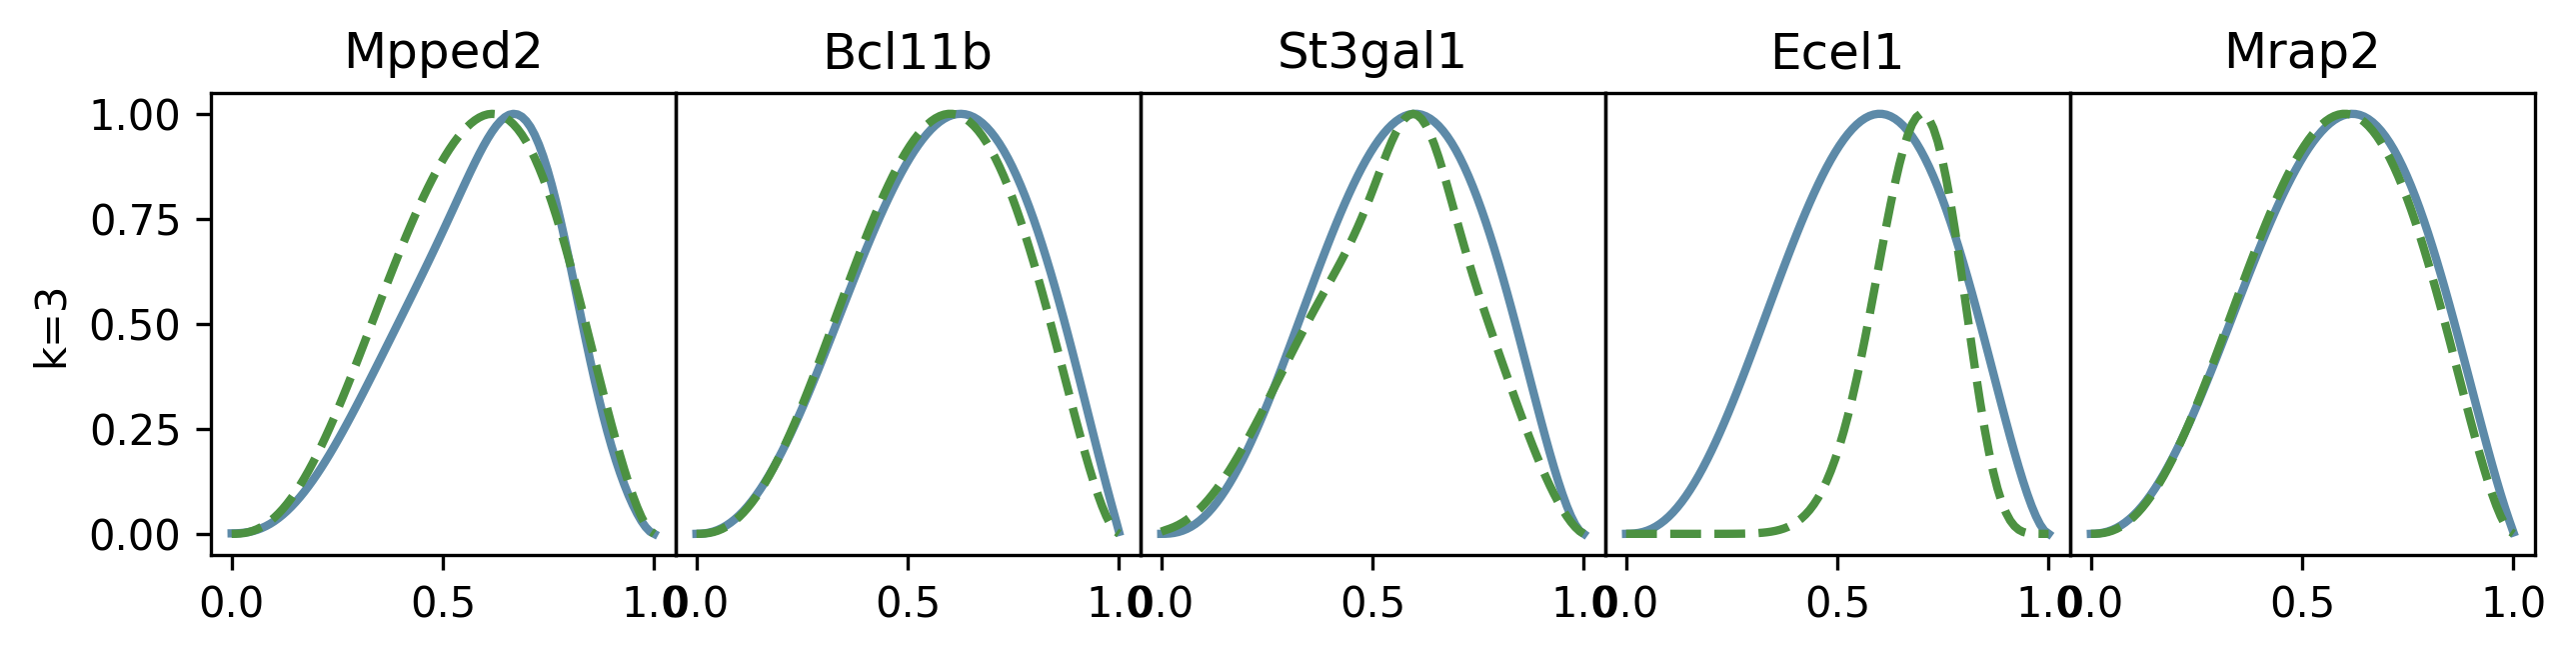

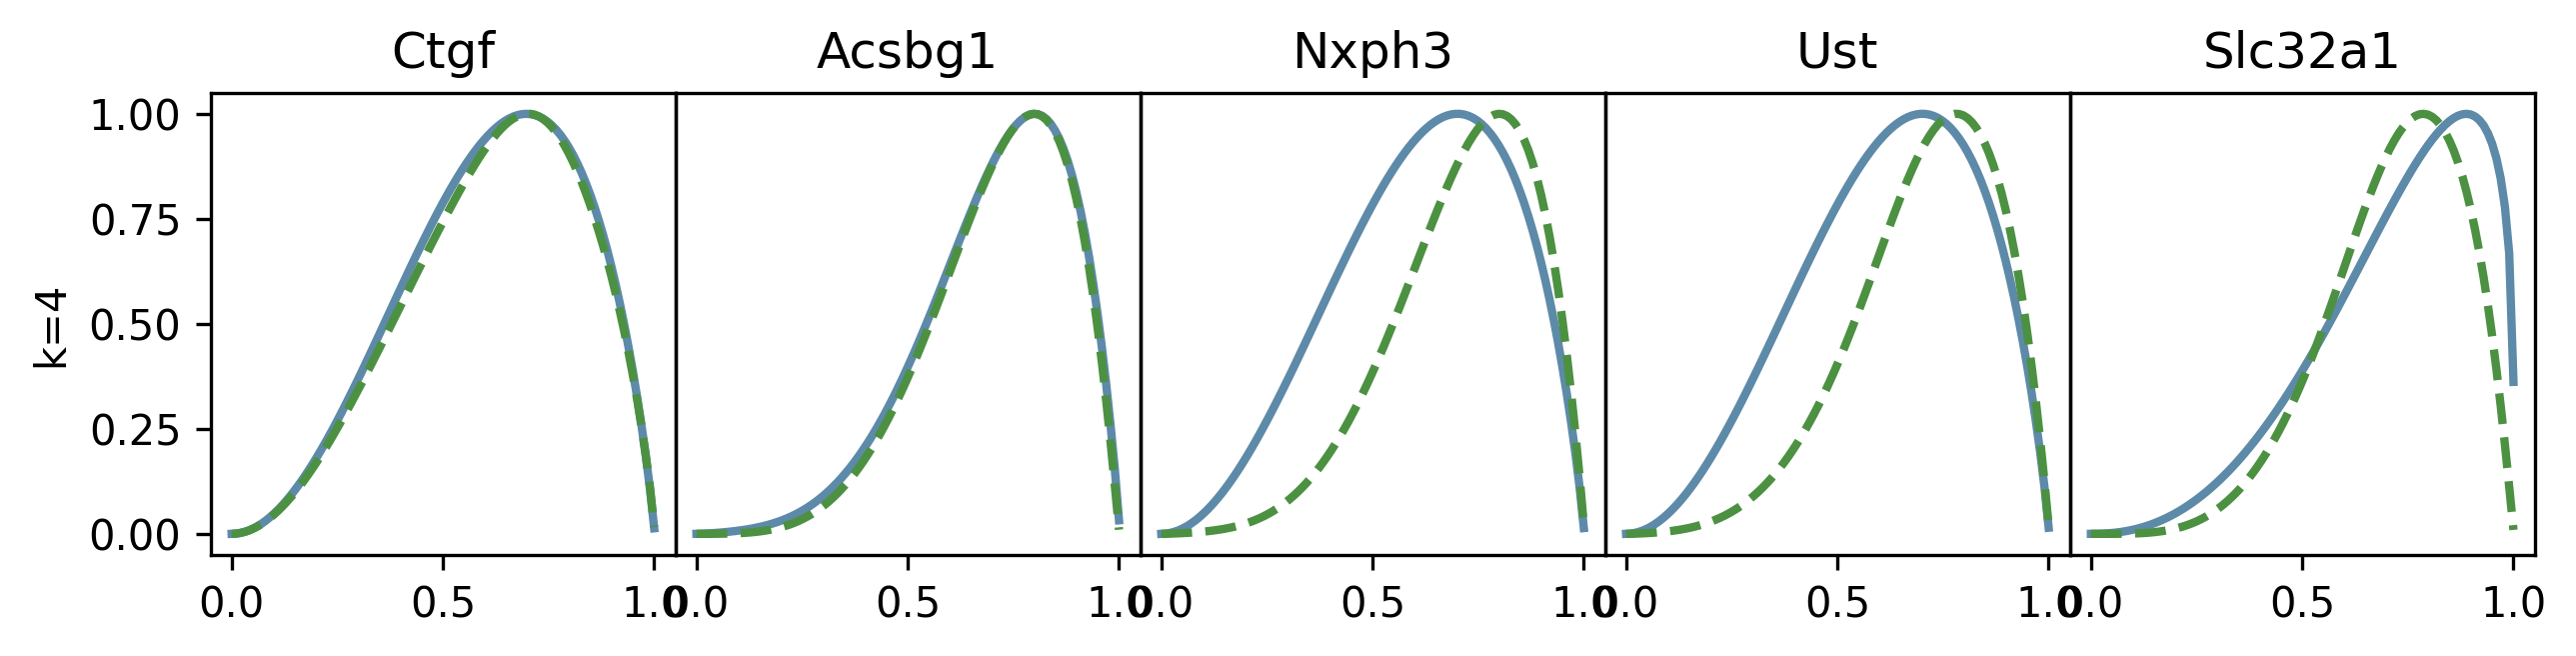

In [46]:
# plot lam of common genes
for k in range(4):
    set1 = set(np.array(gene_dict['EX'])[label_dict['EX']==k])
    set2 = set(np.array(gene_dict['IN'])[label_dict['IN']==k])
    only_set1 = len(set1 - set2) 
    only_set2 = len(set2 - set1) 
    set1_and_set2 = len(set1 & set2) 
    
    nc = 5
    nr = int(np.ceil(set1_and_set2/nc))
    ss_nc = 2
    ss_nr = 2
    fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
    gs = fig.add_gridspec(nr,nc,
                          width_ratios=[1]*nc,
                          height_ratios=[1]*nr)
    gs.update(wspace=0.0, hspace=0.0)
    
    gl = list(set1 & set2)[:5]
    for i, g in enumerate(gl):
        ax = plt.subplot(gs[i//nc, i%nc])
        t = 'EX'
        ig = np.where(gene_dict[t]==g)[0][0]
        lam = lam_dict[t][ig]
        x = np.linspace(0,1,100)
        y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
        ax.plot(x,y, color=lightblue, lw=2)
        t = 'IN'
        ig = np.where(gene_dict[t]==g)[0][0]
        lam = lam_dict[t][ig]
        x = np.linspace(0,1,100)
        y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
        ax.plot(x,y, color=darkgreen, linestyle='dashed', lw=2)
        ax.set_title(g)
        if i==0: ax.set_ylabel(f'k={k+1}')
        if i%nc !=0: ax.set_yticks([])

In [20]:
# lnc genes
def parse_gencode_annotation(annotation_file):
    lnc_genes = set()
    with open(annotation_file, 'r') as f:
        for line in f:
            if line.startswith('#'):
                continue
            fields = line.strip().split('\t') 
            if fields[2] == 'gene' and ' gene_type "lncRNA"' in fields[8].split(';'):
                gene_name = fields[8].split(';')[2].split('"')[1]  # Extract gene name
                lnc_genes.add(gene_name)
    return lnc_genes

def check_if_lnc(genes_list, labels_list, lnc_genes):
    lnc_genes_in_list = [gene for gene in genes_list if gene in lnc_genes]
    lnc_genes_labels = [labels_list[ig] for ig, gene in enumerate(genes_list) if gene in lnc_genes]
    return lnc_genes_in_list, lnc_genes_labels

annotation_file = 'input/gencode.vM34.annotation.gtf'
lnc_genes = parse_gencode_annotation(annotation_file)

for t in type_list:
    gene_list = np.array(gene_dict[t])[p_fdr_dict[t]<=0.05]
    label_list = np.array(label_dict[t])[p_fdr_dict[t]<=0.05]
    lnc_genes_in_list, lnc_genes_labels = check_if_lnc(gene_list, label_list, lnc_genes)
    print(f'{t} #lnc={len(lnc_genes_in_list)}\n{lnc_genes_in_list}\nlabels:{lnc_genes_labels}')

EX #lnc=5
['A830036E02Rik', 'Dlx6os1', 'Rmst', 'B020031H02Rik', '4921539H07Rik']
labels:[0, 0, 1, 0, 0]
IN #lnc=7
['Dlx6os1', 'A830036E02Rik', 'Dlx1as', 'Rmst', 'B020031H02Rik', 'B230323A14Rik', '4930426D05Rik']
labels:[0, 0, 2, 0, 0, 1, 1]
Astr #lnc=5
['2900052N01Rik', 'Rmst', 'Emx2os', 'Dlx6os1', 'B230323A14Rik']
labels:[0, 0, 0, 0, 0]
Oligo #lnc=2
['C030029H02Rik', 'A830036E02Rik']
labels:[0, 1]


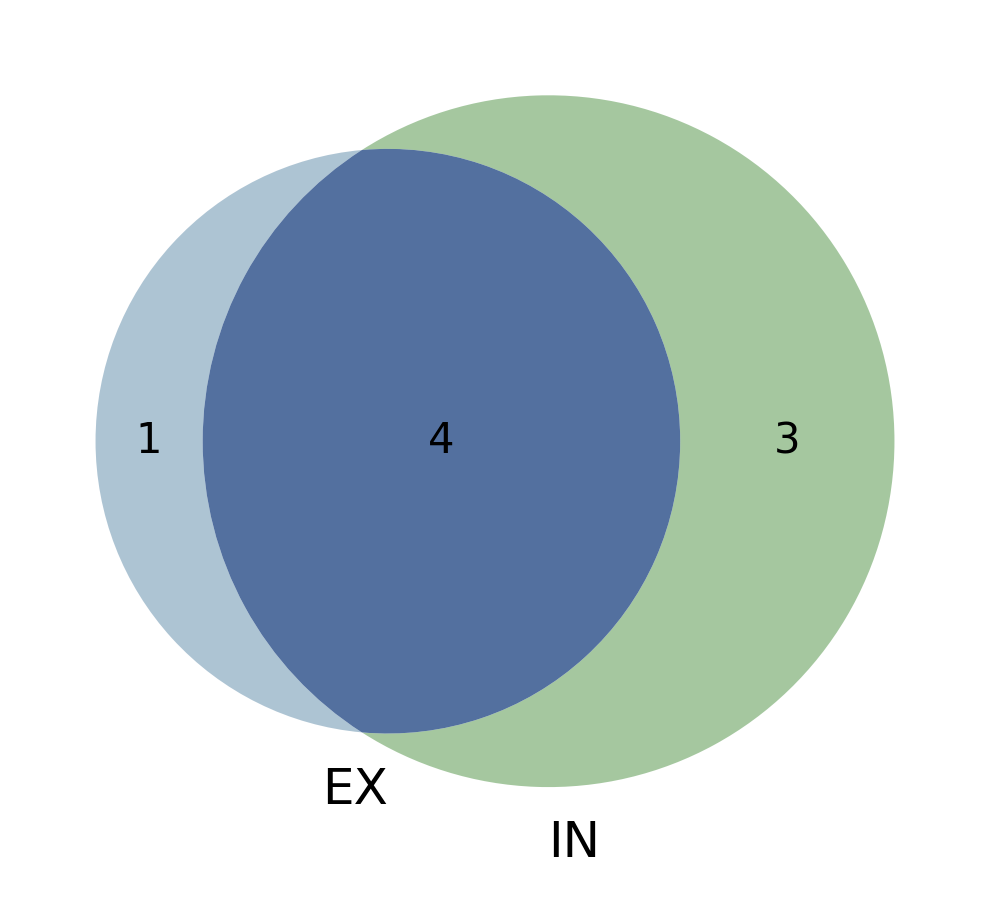

In [59]:
# common lnc genes
t = 'EX'
gene_list = np.array(gene_dict[t])[p_fdr_dict[t]<=0.05]
label_list = np.array(label_dict[t])[p_fdr_dict[t]<=0.05]
lnc_genes_in_list_t1, lnc_genes_labels_t1 = check_if_lnc(gene_list, label_list, lnc_genes)
t = 'IN'
gene_list = np.array(gene_dict[t])[p_fdr_dict[t]<=0.05]
label_list = np.array(label_dict[t])[p_fdr_dict[t]<=0.05]
lnc_genes_in_list_t20, lnc_genes_labels_t20 = check_if_lnc(gene_list, label_list, lnc_genes)

# venn plot
plt.figure(figsize=(4,4), dpi=300) 

set1 = set(lnc_genes_in_list_t1)
set2 = set(lnc_genes_in_list_t20)

only_set1 = len(set1 - set2) 
only_set2 = len(set2 - set1) 
set1_and_set2 = len(set1 & set2) 

venn = venn2(subsets=(only_set1, only_set2, set1_and_set2), set_labels=('EX', 'IN'))

venn.get_patch_by_id('10').set_color(lightblue)
venn.get_patch_by_id('10').set_alpha(0.5) 
venn.get_patch_by_id('01').set_color(darkgreen)
venn.get_patch_by_id('01').set_alpha(0.5) 
venn.get_patch_by_id('11').set_color(darkblue)
venn.get_patch_by_id('11').set_alpha(0.8) 

for patch in venn.patches:
    patch.set_linewidth(0)

# plt.savefig(f'figs/fig_lnc_venn.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'figs/fig_lnc_venn.png', dpi=300, bbox_inches='tight')

['A830036E02Rik', 'B020031H02Rik', 'Dlx6os1', 'Rmst']


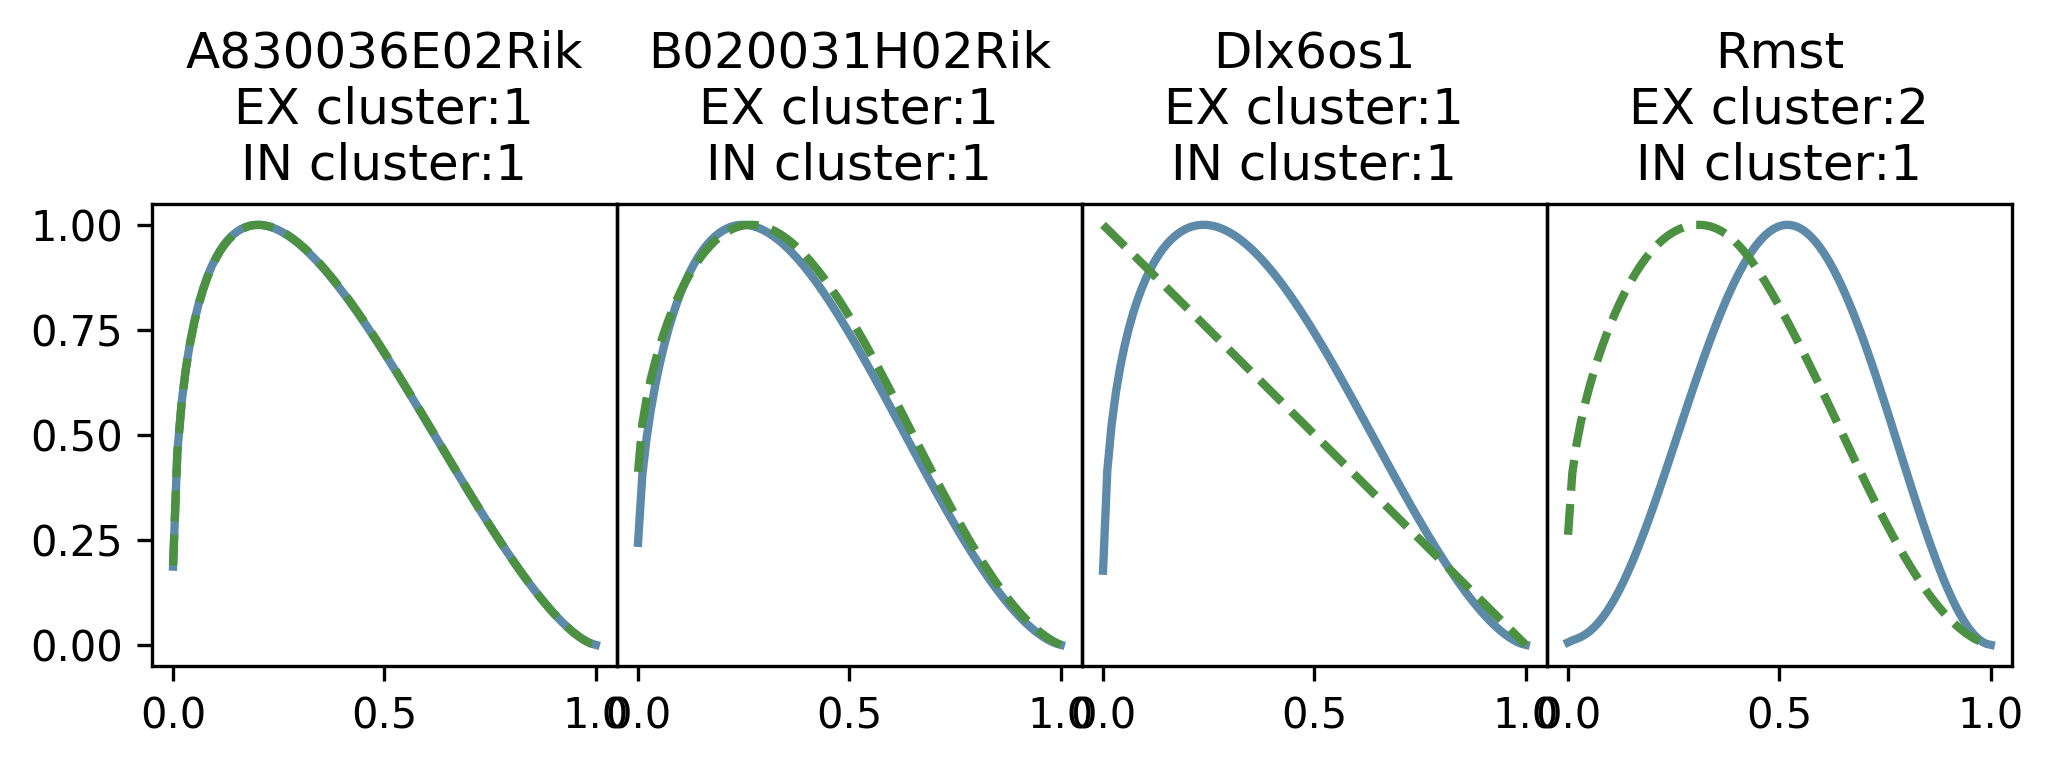

In [62]:
# lam of common lnc genes
gl_com = list(set1 & set2)

nc = 5
nr = int(np.ceil(len(gl_com)/nc))
ss_nc = 2
ss_nr = 2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)

gl = gl_com
for i, g in enumerate(gl):
    ax = plt.subplot(gs[i//nc, i%nc])
    t = 'EX'
    ig = np.where(gene_dict[t]==g)[0][0]
    lam = lam_dict[t][ig]
    lab1 = label_dict[t][ig]
    x = np.linspace(0,1,100)
    y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
    ax.plot(x,y, color=lightblue, lw=2)
    t = 'IN'
    ig = np.where(gene_dict[t]==g)[0][0]
    lam = lam_dict[t][ig]
    lab2 = label_dict[t][ig]
    x = np.linspace(0,1,100)
    y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
    ax.plot(x,y, color=darkgreen, linestyle='dashed', lw=2)
    ax.set_title(f'{g}\nEX cluster:{lab1+1}\nIN cluster:{lab2+1}')
    if i%nc !=0: ax.set_yticks([])
        
print(gl)

In [23]:
# check mt genes
t = 'EX'
gene_t = gene_dict[t]
label_t = label_dict[t]
mt_t1 = []
mt_label_t1 = []
for i, g in enumerate(gene_t):
    if g.startswith('mt-'):
        mt_t1.append(g)
        mt_label_t1.append(label_t[i])
mt_sig_t1 = np.array(mt_t1)[np.array(mt_label_t1)!=-1]
print(f'#sig mt={len(mt_sig_t1)} {mt_sig_t1}')

t = 'IN'
gene_t = gene_dict[t]
label_t = label_dict[t]
mt_t20 = []
mt_label_t20 = []
for i, g in enumerate(gene_t):
    if g.startswith('mt-'):
        mt_t20.append(g)
        mt_label_t20.append(labels_t[i])
mt_sig_t20 = np.array(mt_t20)[np.array(mt_label_t20)!=-1]
print(f'#sig mt={len(mt_sig_t20)} {mt_sig_t20}')

#sig mt=0 []
#sig mt=0 []


In [4]:
# check stereoseq cell type marker genes
type1_list = ['Tcf7l2', 'Prkcd', 'Prox1', 'Hpca', 'Th', 'Rprm', 'Cpne4', 
              'Myl4', 'Rorb', 'Cux2', 'Lamp5', 'Slc17a6', 'Slc17a7', 'Tubb3']
type20_list = ['Reln', 'Pvalb', 'Sst', 'Npy', 'Vip', 'Gad2', 'Gad1']

# check cell type marker genes
t = 'EX'
gene_t = gene_dict[t]
label_t = label_dict[t]
c1_label = []
for g in type1_list:
    j = np.where(gene_t==g)[0]
    if len(j)==1:
        c1_label.append(label_t[j[0]])
    else:
        c1_label.append(-2)
c2_label = []
for g in type20_list:
    j = np.where(gene_t==g)[0]
    if len(j)==1:
        c2_label.append(label_t[j[0]])
    else:
        c2_label.append(-2)
        
print(f'type {t}')
print(f'sig type1 marker {np.array(type1_list)[np.array(c1_label)>-1]} {np.array(c1_label)[np.array(c1_label)>-1]}')
print(f'sig type20 marker {np.array(type20_list)[np.array(c2_label)>-1]} {np.array(c2_label)[np.array(c2_label)>-1]}')

t = 'IN'
gene_t = gene_dict[t]
label_t = label_dict[t]
c1_label = []
for g in type1_list:
    j = np.where(gene_t==g)[0]
    if len(j)==1:
        c1_label.append(label_t[j[0]])
    else:
        c1_label.append(-2)
c2_label = []
for g in type20_list:
    j = np.where(gene_t==g)[0]
    if len(j)==1:
        c2_label.append(label_t[j[0]])
    else:
        c2_label.append(-2)
        
print(f'type {t}')
print(f'sig type1 marker {np.array(type1_list)[np.array(c1_label)>-1]} {np.array(c1_label)[np.array(c1_label)>-1]}')
print(f'sig type20 marker {np.array(type20_list)[np.array(c2_label)>-1]} {np.array(c2_label)[np.array(c2_label)>-1]}')

type EX
sig type1 marker ['Rorb' 'Cux2' 'Lamp5' 'Slc17a6'] [3 1 2 3]
sig type20 marker [] []
type IN
sig type1 marker ['Cux2' 'Lamp5' 'Slc17a7'] [2 3 3]
sig type20 marker ['Reln'] [2]


(0.0, 1.0, 0.0, 1.0)

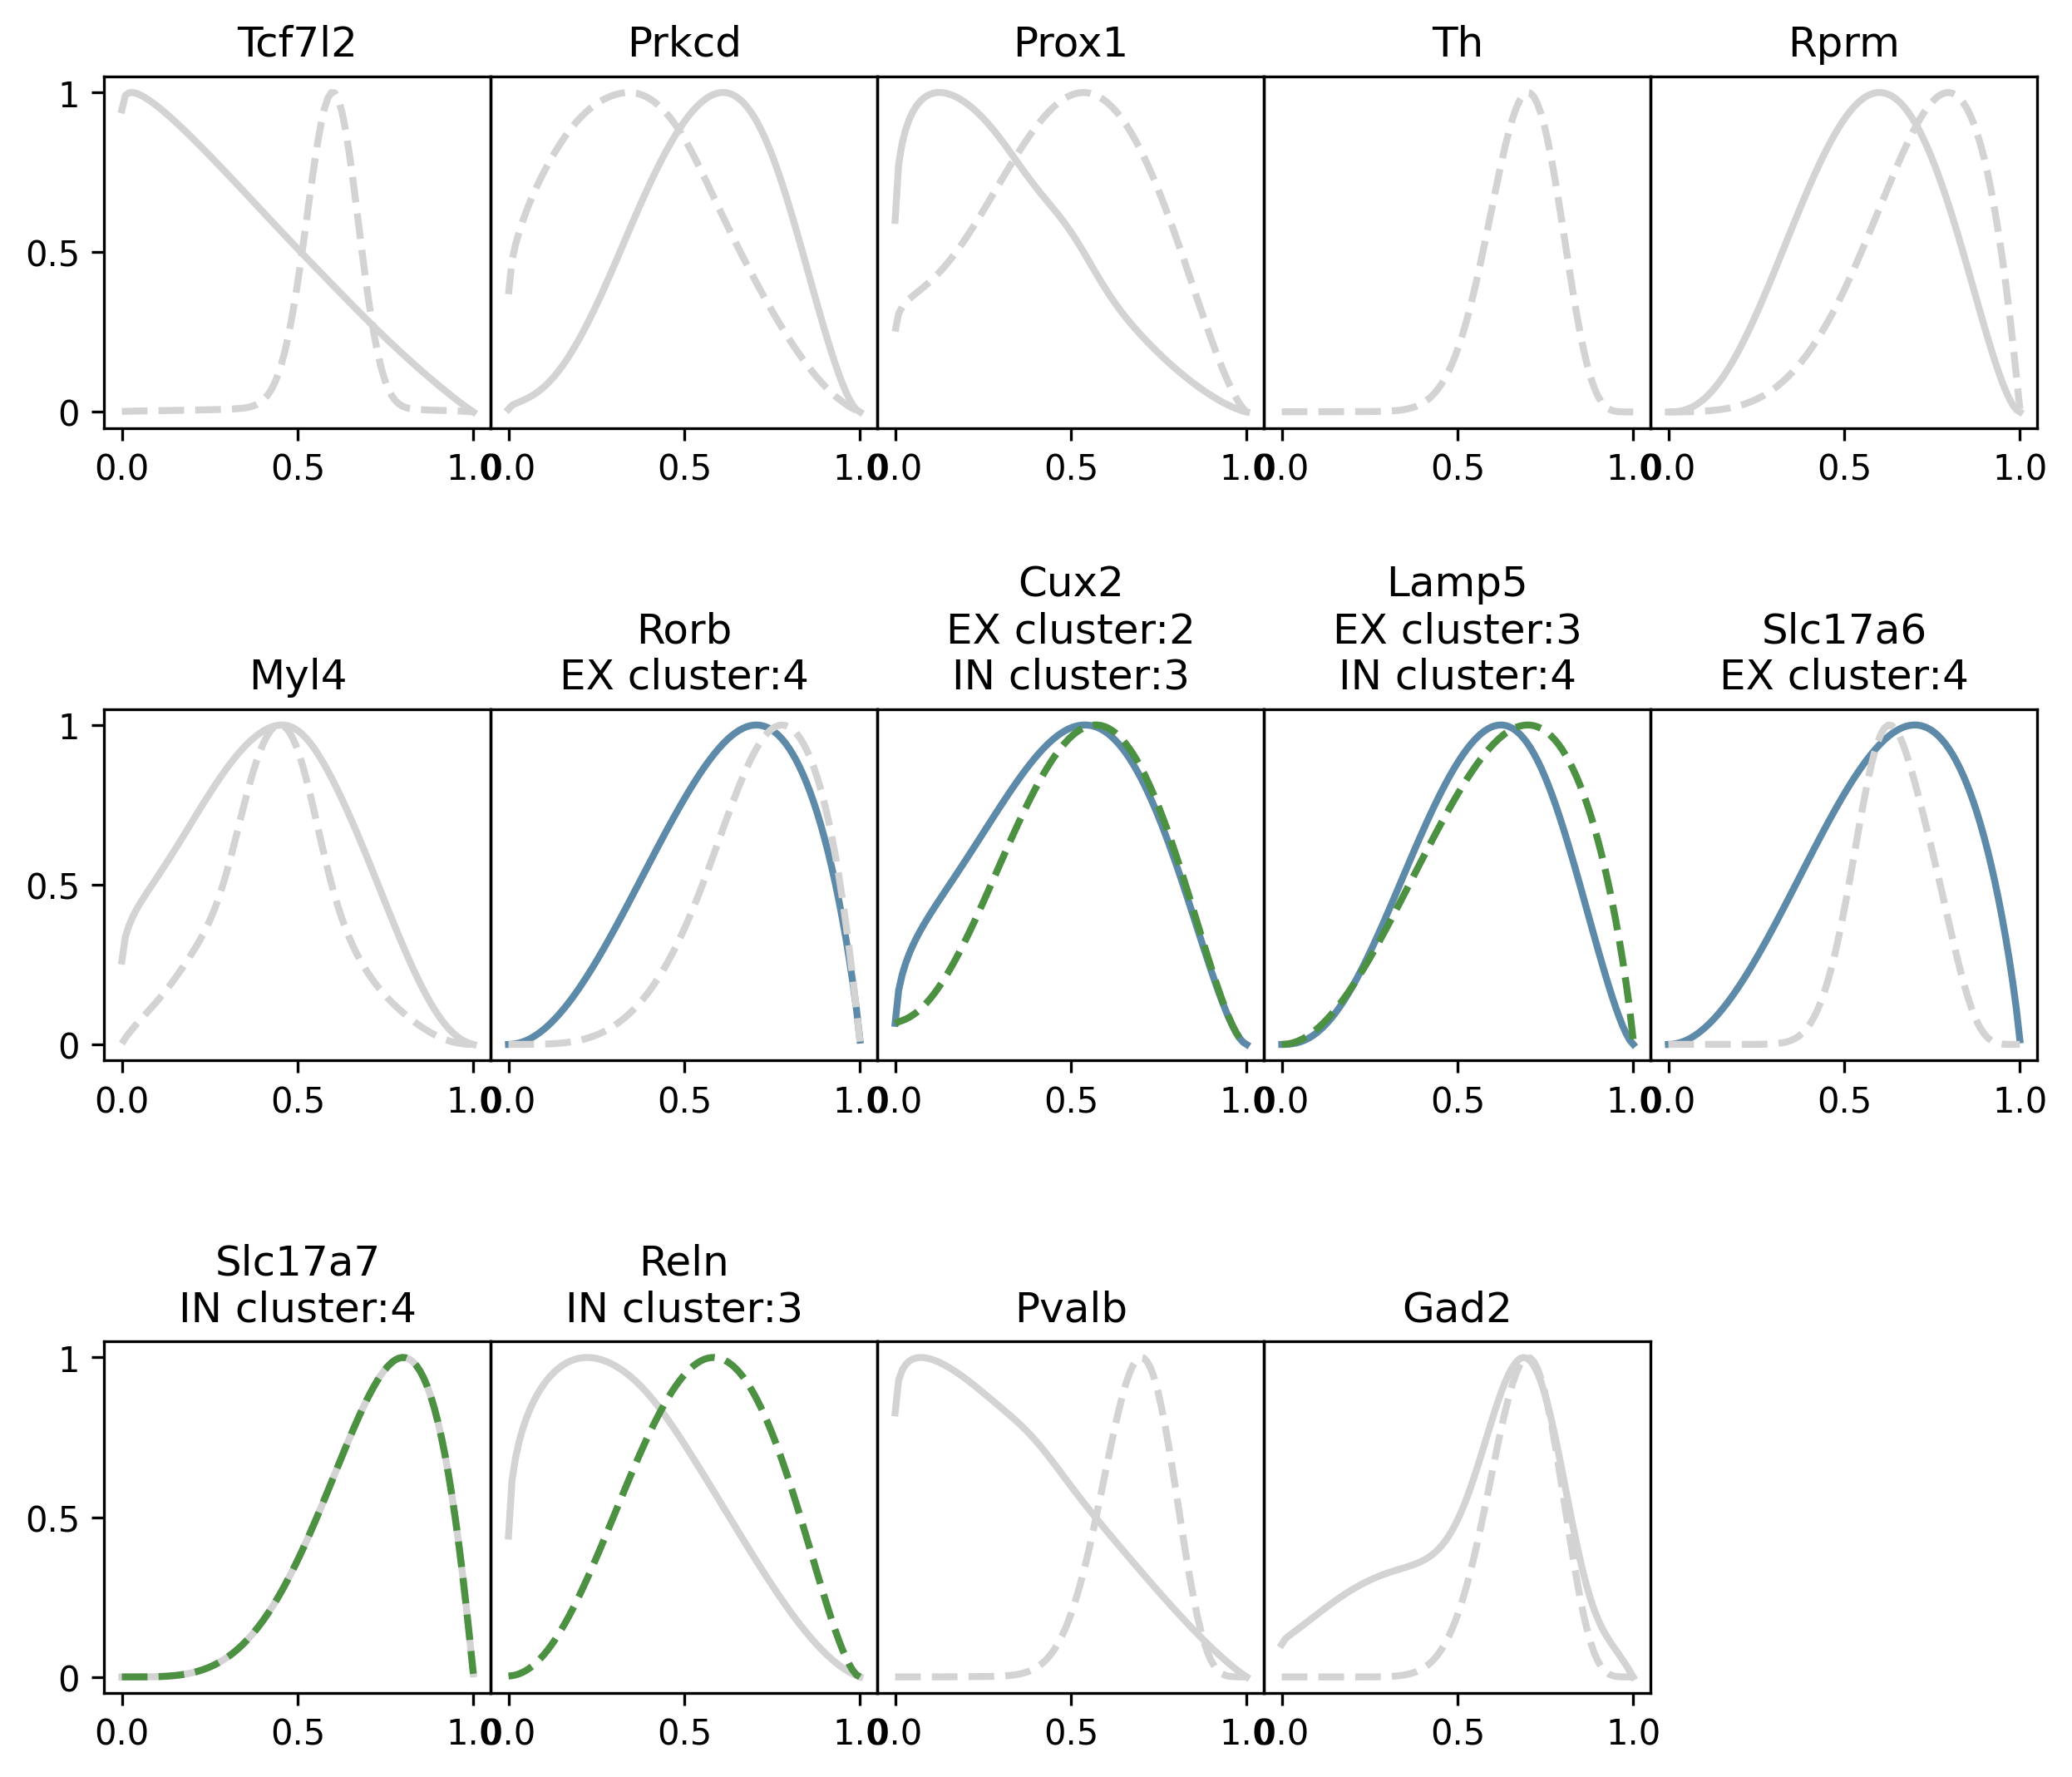

In [19]:
# lam of t1 and t20 marker genes
gl_com = type1_list + type20_list

nc = 5
nr = int(np.ceil(len(gl_com)/nc))
ss_nc = 2
ss_nr = 3
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.8)

gl = gl_com
j=0
for i, g in enumerate(gl):
    ax = plt.subplot(gs[j//nc, j%nc])
    if g in gene_dict['EX'] or g in gene_dict['IN']:
        t = 'EX'
        if g in gene_dict[t]:
            ig = np.where(gene_dict[t]==g)[0][0]
            lam = lam_dict[t][ig]
            lab1 = label_dict[t][ig]
            x = np.linspace(0,1,100)
            y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
            if lab1 != -1: 
                color=lightblue
            else:
                color=lightgray
            ax.plot(x,y, color=color, lw=2)

        t = 'IN'
        if g in gene_dict[t]:
            ig = np.where(gene_dict[t]==g)[0][0]
            lam = lam_dict[t][ig]
            lab2 = label_dict[t][ig] 
            x = np.linspace(0,1,100)
            y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
            if lab2 != -1: 
                color=darkgreen
            else:
                color=lightgray
            ax.plot(x,y, color=color, linestyle='dashed', lw=2)
            if lab1!=-1 and lab2 !=-1:
                ax.set_title(f'{g}\nEX cluster:{lab1+1}\nIN cluster:{lab2+1}')
            if lab1!=-1 and lab2==-1:
                ax.set_title(f'{g}\nEX cluster:{lab1+1}')
            if lab1==-1 and lab2!=-1:
                ax.set_title(f'{g}\nIN cluster:{lab2+1}')
            if lab1==-1 and lab2==-1:
                ax.set_title(f'{g}')
            if i%nc !=0: ax.set_yticks([])
        j = j+1
    if (j-1)%nc ==0: 
        ax.set_yticks([0,0.5,1], [0,0.5,1]) 

ax = plt.subplot(gs[0, 4])
ax.set_yticks([])    
ax = plt.subplot(gs[1, 3])
ax.set_yticks([])    
ax = plt.subplot(gs[2, 2])
ax.set_yticks([])    
ax = plt.subplot(gs[2, 4])
ax.axis('off')

In [26]:
# transcription factors
fn = 'input/Browse Transcription Factors mm9 - resource_browser.csv'
tab = pd.read_csv(fn)
tf_list = tab.Symbol.unique().tolist()

# type 1
t = 'EX'
list1_lower = [item.lower() for item in tf_list]
list2_lower = [item.lower() for item in np.array(gene_dict[t])[label_dict[t]!=-99]]
type1_tf = set(list1_lower).intersection(set(list2_lower))
print(f'#tf in type {t}={len(type1_tf)}')
type1_lab = []
for g in type1_tf:
    ig = np.where(np.array(gene_dict[t])==g.capitalize())[0][0]
    type1_lab.append(label_dict[t][ig])
print(Counter(type1_lab))

# type 20
t = 'IN'
list1_lower = [item.lower() for item in tf_list]
list2_lower = [item.lower() for item in np.array(gene_dict[t])[label_dict[t]!=-99]]
type20_tf = set(list1_lower).intersection(set(list2_lower))
print(f'#tf in type {t}={len(type20_tf)}')
type20_lab = []
for g in type20_tf:
    ig = np.where(np.array(gene_dict[t])==g.capitalize())[0][0]
    type20_lab.append(label_dict[t][ig])
print(Counter(type20_lab))

#tf in type EX=146
Counter({-1: 111, 0: 14, 2: 9, 1: 8, 3: 4})
#tf in type IN=135
Counter({-1: 99, 2: 14, 0: 11, 3: 7, 1: 4})


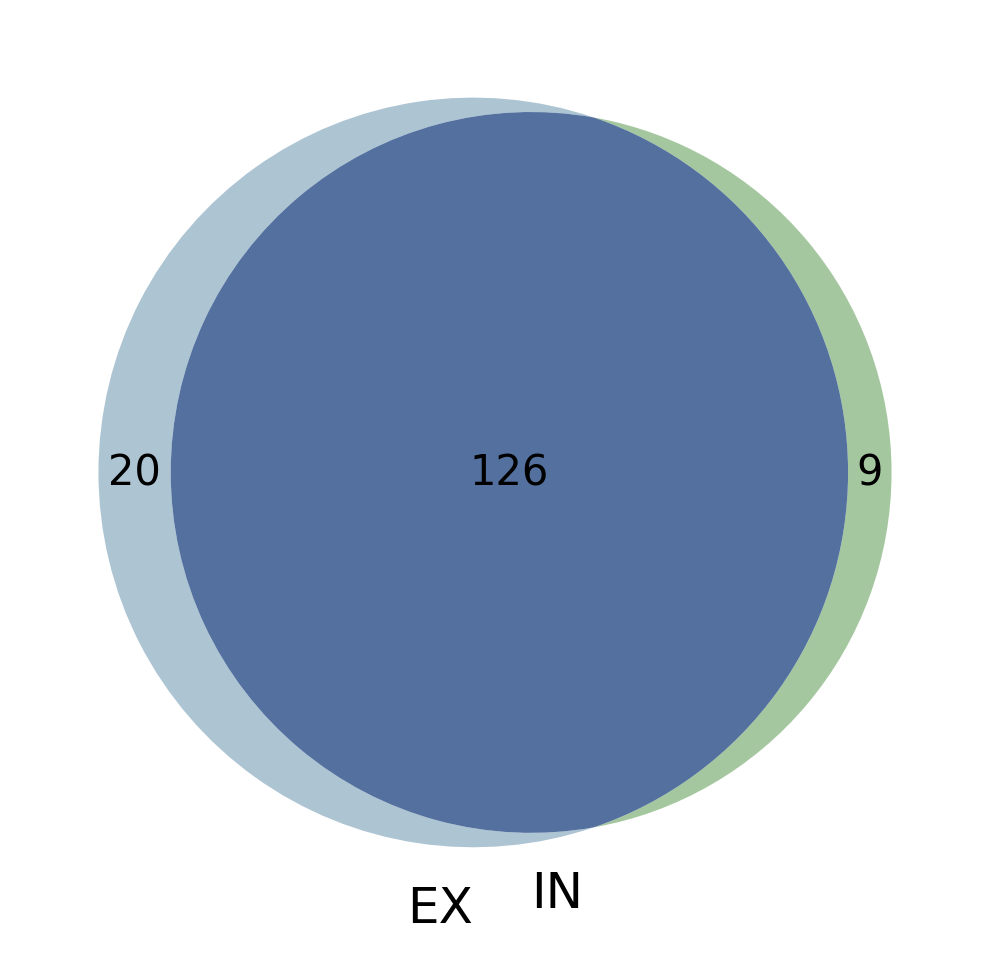

In [49]:
# com tf venn plot
plt.figure(figsize=(4,4), dpi=300) 

set1 = set(type1_tf)
set2 = set(type20_tf)

only_set1 = len(set1 - set2) 
only_set2 = len(set2 - set1) 
set1_and_set2 = len(set1 & set2) 

venn = venn2(subsets=(only_set1, only_set2, set1_and_set2), set_labels=('EX', 'IN'))

venn.get_patch_by_id('10').set_color(lightblue)
venn.get_patch_by_id('10').set_alpha(0.5) 
venn.get_patch_by_id('01').set_color(darkgreen)
venn.get_patch_by_id('01').set_alpha(0.5) 
venn.get_patch_by_id('11').set_color(darkblue)
venn.get_patch_by_id('11').set_alpha(0.8) 

for patch in venn.patches:
    patch.set_linewidth(0)

# plt.savefig(f'figs/fig_tf_venn.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'figs/fig_tf_venn.png', dpi=300, bbox_inches='tight')

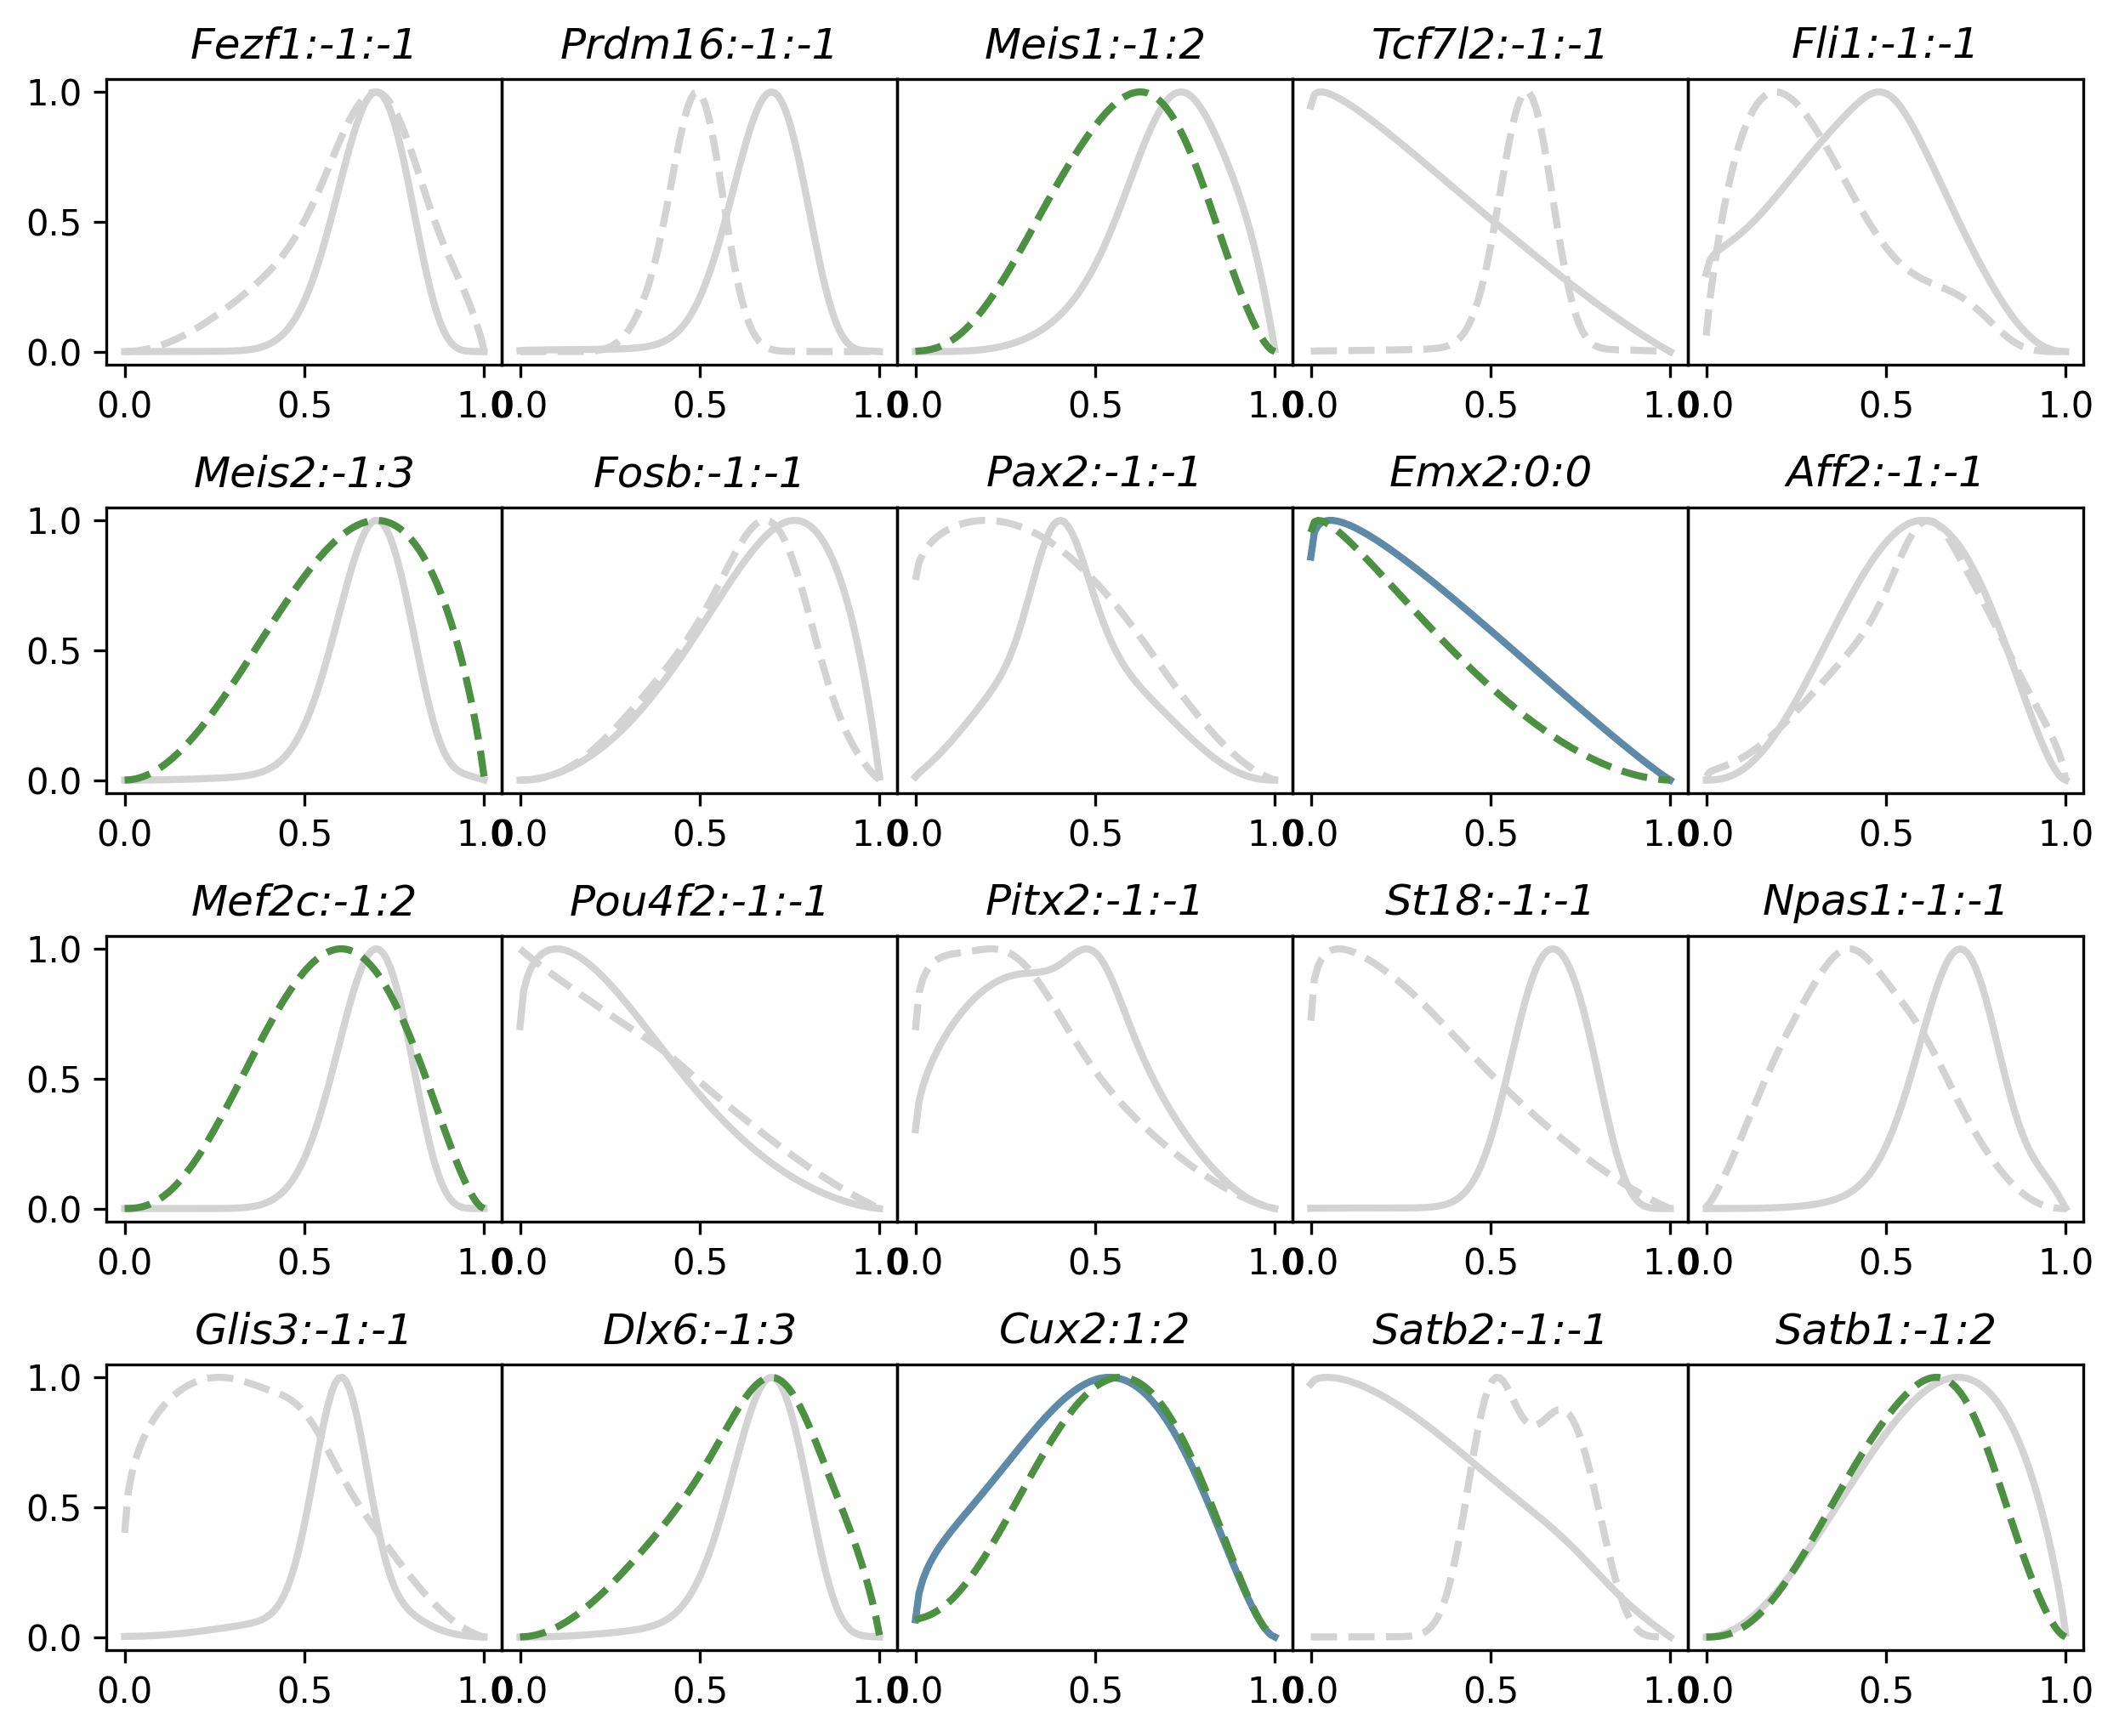

In [50]:
# lam est of the 95 overlaped TF
gl = list(set1 & set2)[:20]

nc = 5
nr = int(np.ceil(len(gl)/nc))
ss_nc = 2
ss_nr = 2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)

for i, g in enumerate(gl):
    ax = plt.subplot(gs[i//nc, i%nc])
    t = 'EX'
    if g.capitalize() in gene_dict[t]:
        ig = np.where(gene_dict[t]==g.capitalize())[0][0]
        lam = lam_dict[t][ig]
        lab1 = label_dict[t][ig]
        x = np.linspace(0,1,100)
        y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
        if lab1 != -1: 
            color=lightblue
        else:
            color=lightgray
        ax.plot(x,y, color=color, lw=2)
    else:
        ax.set_title(f'{g.capitalize()}')
    t = 'IN'
    if g.capitalize() in gene_dict[t]:
        ig = np.where(gene_dict[t]==g.capitalize())[0][0]
        lam = lam_dict[t][ig]
        lab20 = label_dict[t][ig] 
        x = np.linspace(0,1,100)
        y = (lam-np.min(lam))/(np.max(lam)-np.min(lam))
        if lab20 != -1: 
            color=darkgreen
        else:
            color=lightgray
        ax.plot(x,y, color=color, linestyle='dashed', lw=2)
        ax.set_title(f'{g.capitalize()}:{lab1}:{lab20}', fontstyle='italic')
        if i%nc !=0: ax.set_yticks([])
    else:
        ax.set_title(f'{g.capitalize()}')
        if i%nc !=0: ax.set_yticks([])

In [51]:
# over representation analysis or GSEA
import gseapy
from gseapy import ringplot
from gseapy import barplot, dotplot

In [52]:
# select genesets
genesets_selected = [
#     'MSigDB_Computational',
#     'MSigDB_Hallmark_2020',
#     'MSigDB_Oncogenic_Signatures',
    
#     'ENCODE_Histone_Modifications_2013',
#     'ENCODE_Histone_Modifications_2015',
#     'ENCODE_TF_ChIP-seq_2014',
#     'ENCODE_TF_ChIP-seq_2015',
#     'ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X',
    
    'GO_Biological_Process_2021',
#     'GO_Cellular_Component_2021',
#     'GO_Molecular_Function_2021',
#     'KEGG_2019_Mouse',
    
#     'ARCHS4_TFs_Coexp',
#     'Chromosome_Location', # nonsig
#     'Chromosome_Location_hg19', # nonsig    
#     'WikiPathways_2019_Mouse',
#     'InterPro_Domains_2019',
#     'Pfam_Domains_2019',
#     'Pfam_InterPro_Domains', # not applicable
#     'lncHUB_lncRNA_Co-Expression',
#     'miRTarBase_2017' # nonsig
#     'ENCODE_TF_ChIP-seq_2015',
]
print(f'#gs selected={len(genesets_selected)}')

#gs selected=1


N=15


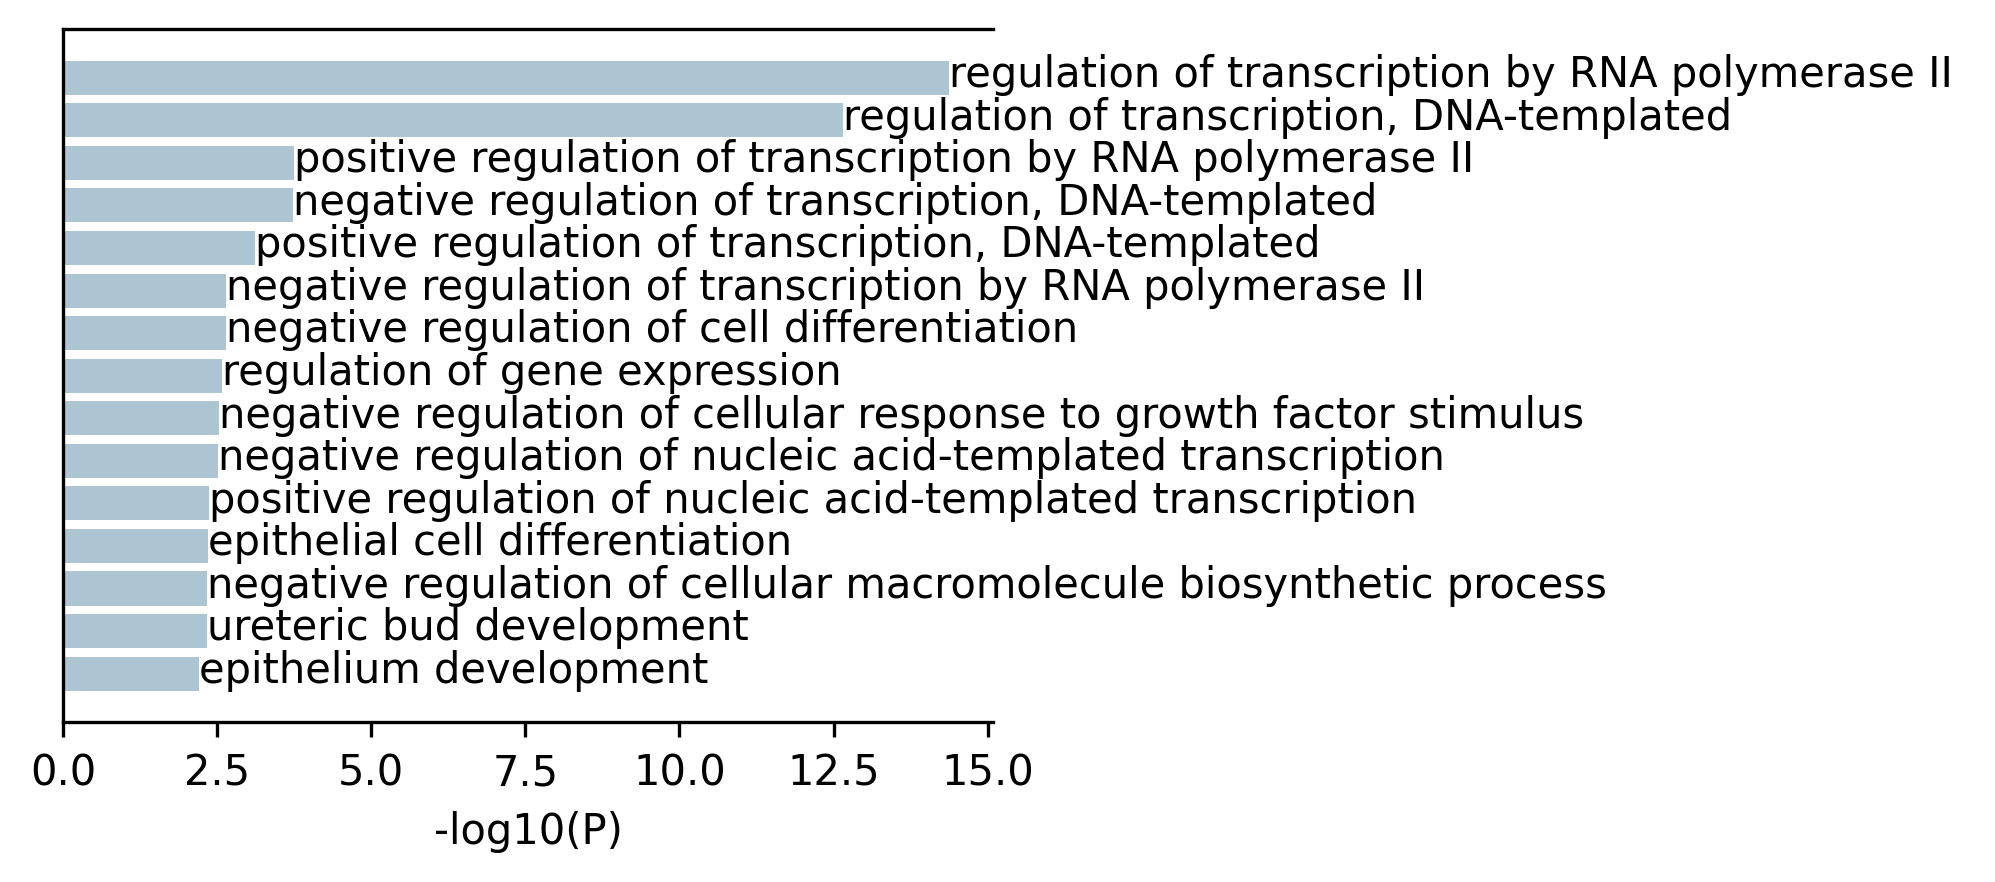

In [53]:
# EX unique tfs

# N = 30 # <<< num of tops sets to show
colors = [red, lightgreen, lightblue, purple]
labels_all = np.concatenate(list(label_dict.values()), axis=0) 
genes_all = np.concatenate(list(gene_dict.values()), axis=0) 

gl = list(set1 - set2) 
bg = gene_dict['EX'].tolist() + gene_dict['IN'].tolist()

enr_k = gseapy.enrichr(
    gene_list = gl,
    gene_sets = genesets_selected,
    background = bg, # ???
    organism='Mouse',
    outdir=None
)

res_k = enr_k.results.sort_values('Adjusted P-value')
set_labels_k = res_k.Gene_set.values
ratios_k = res_k.Overlap.values
set_size_k = []
set_overlap_k = []
for r in ratios_k:
    r1, r2 = r.split('/')
    set_size_k.append(r1)
    set_overlap_k.append(r2)
set_size_k = np.array(set_size_k)
set_overlap_k = np.array(set_overlap_k)
term_k = res_k.Term.values
pv_k = res_k['Adjusted P-value'].values
log10pv_k = -np.log10(pv_k)

N = np.sum(log10pv_k>=2)
print(f'N={N}')

ss = set_labels_k[:N]
tt = term_k[:N]
y_value = term_k[:N]
y_pos = np.flip(np.arange(N))
x_value = log10pv_k[:N]

nr = 1
nc = 1
ss_nr = N/10 * 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)
ax = plt.subplot(gs[0, 0])

ax.barh(y_pos, 
        x_value, 
        color = lightblue,
        alpha=0.5,
        align='center')

for i in range(N): # add geneset names
    tt_i = tt[i]
    set_name_i = (tt_i.split('('))[0]
    ax.text(x_value[i], y_pos[i]-0.2, set_name_i, ha='left', c='k', fontsize=10) 
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_xlabel(f'-log10(P)')
    
# plt.savefig(f'figs/fig_fea_tf_EX.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'figs/fig_fea_tf_EX.png', dpi=300, bbox_inches='tight')

N=9


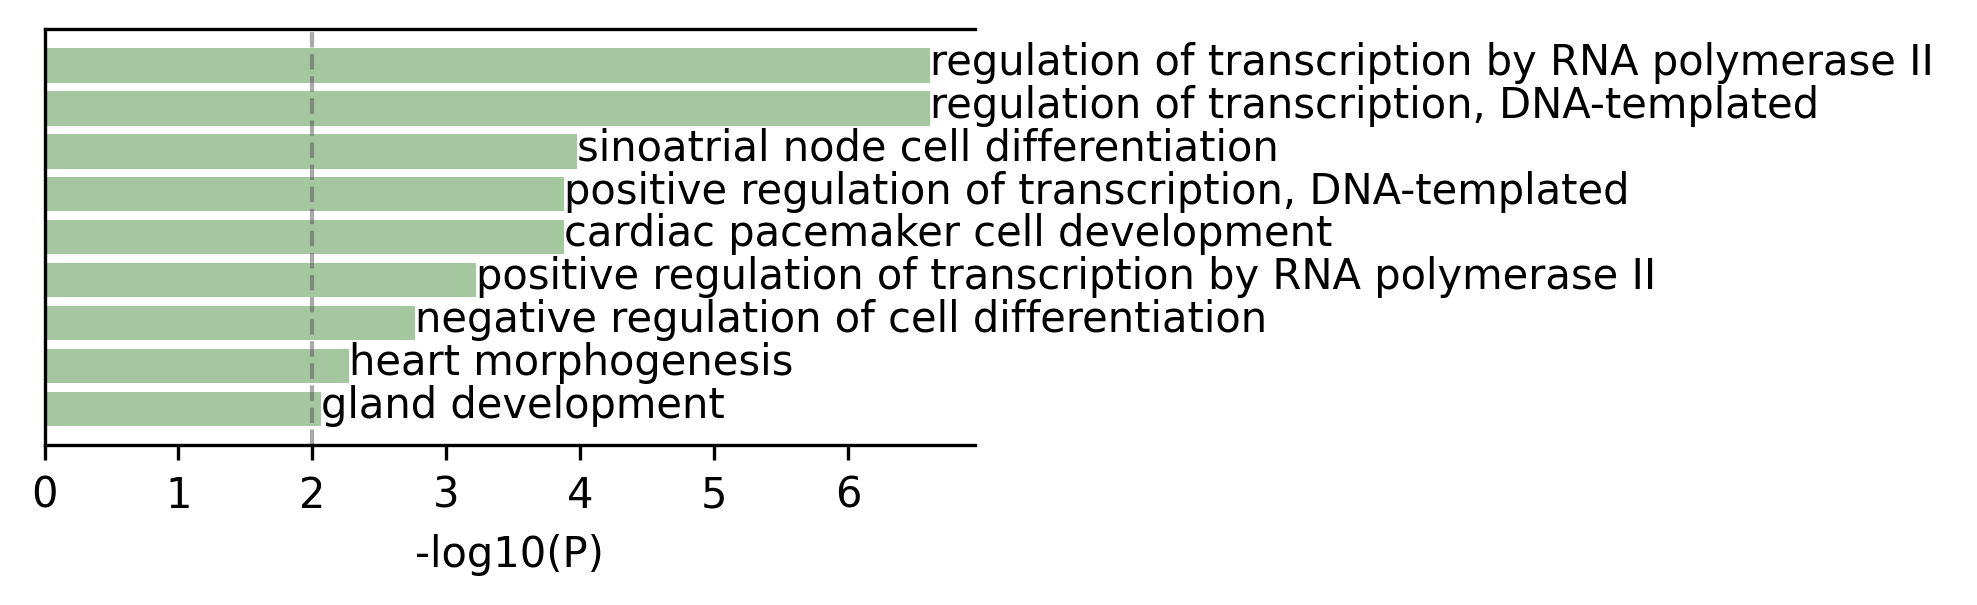

In [54]:
# IN unique tfs

# N = 30 # <<< num of tops sets to show
colors = [red, lightgreen, lightblue, purple]
labels_all = np.concatenate(list(label_dict.values()), axis=0) 
genes_all = np.concatenate(list(gene_dict.values()), axis=0) 

gl = list(set2 - set1) 
bg = gene_dict['EX'].tolist() + gene_dict['IN'].tolist()

enr_k = gseapy.enrichr(
    gene_list = gl,
    gene_sets = genesets_selected,
    background = bg, # ???
    organism='Mouse',
    outdir=None
)

res_k = enr_k.results.sort_values('Adjusted P-value')
set_labels_k = res_k.Gene_set.values
ratios_k = res_k.Overlap.values
set_size_k = []
set_overlap_k = []
for r in ratios_k:
    r1, r2 = r.split('/')
    set_size_k.append(r1)
    set_overlap_k.append(r2)
set_size_k = np.array(set_size_k)
set_overlap_k = np.array(set_overlap_k)
term_k = res_k.Term.values
pv_k = res_k['Adjusted P-value'].values
log10pv_k = -np.log10(pv_k)

N = np.sum(log10pv_k>=2)
print(f'N={N}')

ss = set_labels_k[:N]
tt = term_k[:N]
y_value = term_k[:N]
y_pos = np.flip(np.arange(N))
x_value = log10pv_k[:N]

nr = 1
nc = 1
ss_nr = N/10*2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)
ax = plt.subplot(gs[0, 0])

ax.barh(y_pos, 
        x_value, 
        color = darkgreen,
        alpha=0.5,
        align='center')

for i in range(N): # add geneset names
    tt_i = tt[i]
    set_name_i = (tt_i.split('('))[0]
    ax.text(x_value[i], y_pos[i]-0.2, set_name_i, ha='left', c='k', fontsize=10) 
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.axvline(x = 2, color = darkgray, lw=1, alpha=0.5, linestyle='dashed') # line at -log10p=2
ax.set_xlabel(f'-log10(P)')
    
# plt.savefig(f'figs/fig_fea_tf_IN.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'figs/fig_fea_tf_IN.png', dpi=300, bbox_inches='tight')

N=112


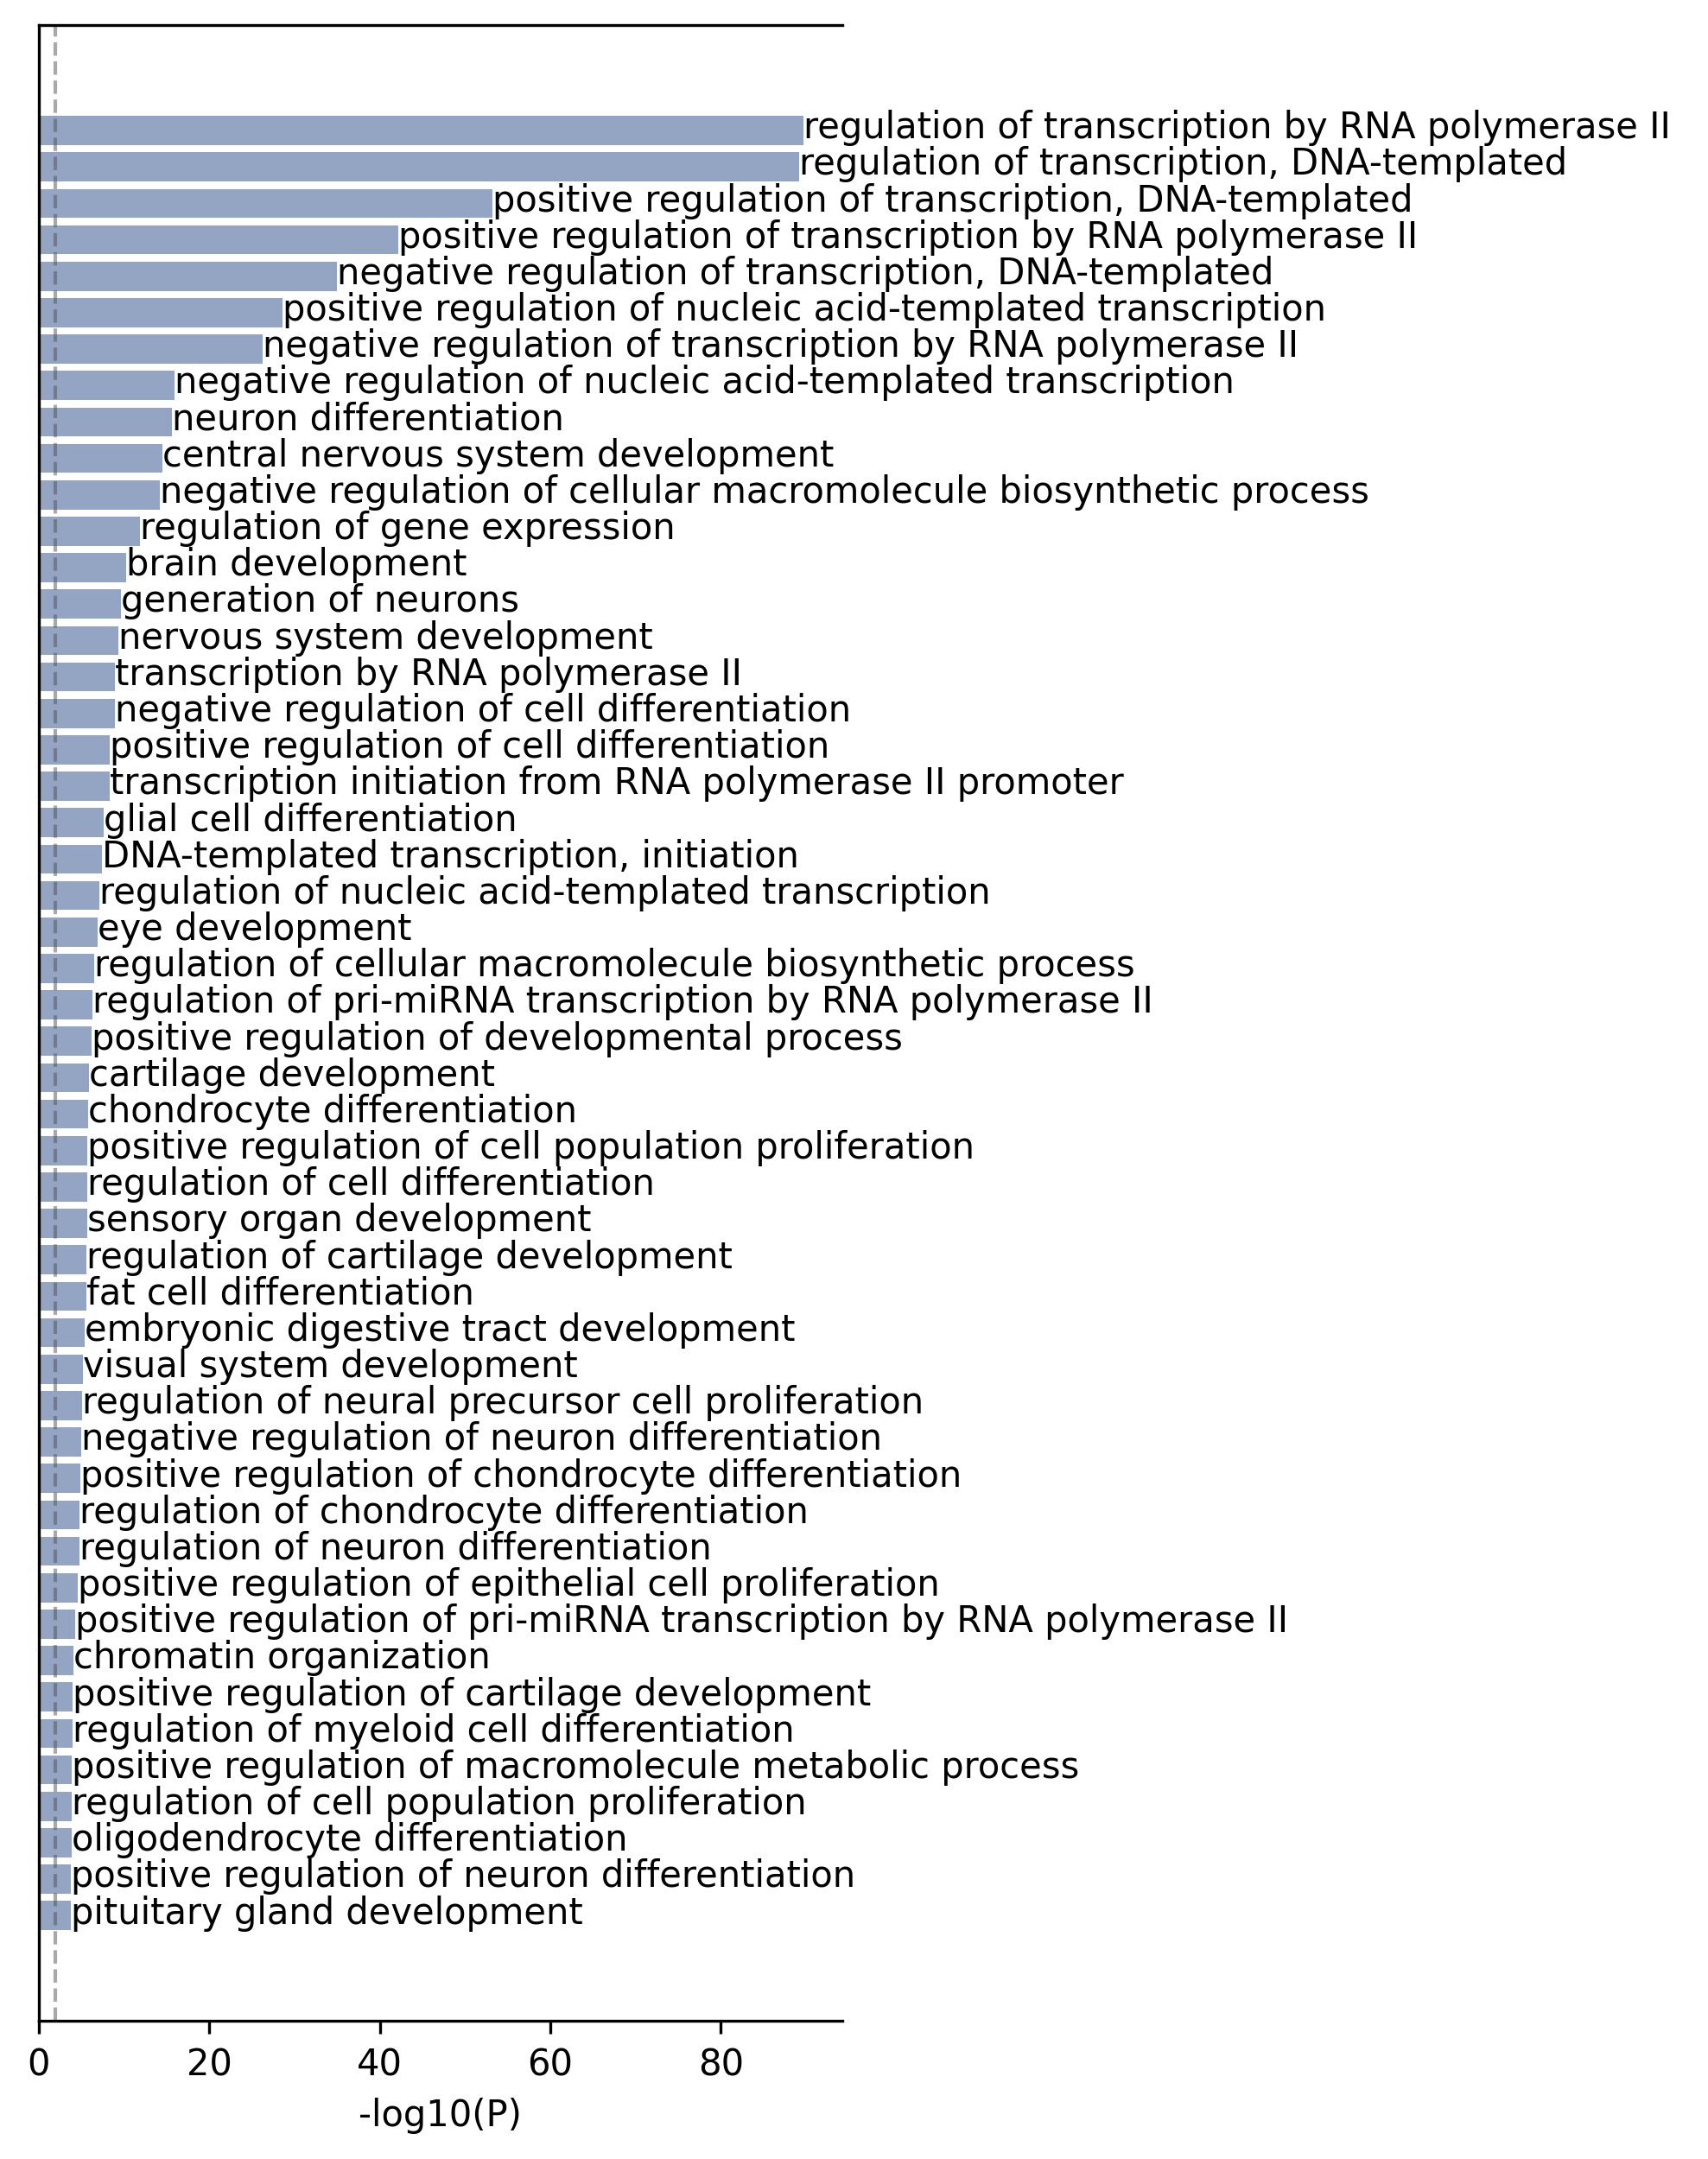

In [56]:
# com tfs

colors = [red, lightgreen, lightblue, purple]
labels_all = np.concatenate(list(label_dict.values()), axis=0) 
genes_all = np.concatenate(list(gene_dict.values()), axis=0) 

gl = list(set1 & set2) 
bg = gene_dict['EX'].tolist() + gene_dict['IN'].tolist()

enr_k = gseapy.enrichr(
    gene_list = gl,
    gene_sets = genesets_selected,
    background = bg, # ???
    organism='Mouse',
    outdir=None
)

res_k = enr_k.results.sort_values('Adjusted P-value')
set_labels_k = res_k.Gene_set.values
ratios_k = res_k.Overlap.values
set_size_k = []
set_overlap_k = []
for r in ratios_k:
    r1, r2 = r.split('/')
    set_size_k.append(r1)
    set_overlap_k.append(r2)
set_size_k = np.array(set_size_k)
set_overlap_k = np.array(set_overlap_k)
term_k = res_k.Term.values
pv_k = res_k['Adjusted P-value'].values
log10pv_k = -np.log10(pv_k)

N = np.sum(log10pv_k>=2)
print(f'N={N}')
N = 50 # <<< num of tops sets to show

ss = set_labels_k[:N]
tt = term_k[:N]
y_value = term_k[:N]
y_pos = np.flip(np.arange(N))
x_value = log10pv_k[:N]

nr = 1
nc = 1
ss_nr = N/10 * 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.5)
ax = plt.subplot(gs[0, 0])

ax.barh(y_pos, 
        x_value, 
        color = darkblue,
        alpha=0.5,
        align='center')

for i in range(N): # add geneset names
    tt_i = tt[i]
    set_name_i = (tt_i.split('('))[0]
    ax.text(x_value[i], y_pos[i]-0.2, set_name_i, ha='left', c='k', fontsize=10) 
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.axvline(x = 2, color = darkgray, lw=1, alpha=0.5, linestyle='dashed') # line at -log10p=2
ax.set_xlabel(f'-log10(P)')
    
# plt.savefig(f'figs/fig_fea_tf_com.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'figs/fig_fea_tf_com.png', dpi=300, bbox_inches='tight')